In [1]:
import pandas as pd
import numpy as np
from pylibrary.NIE_data_cleaning import manage_anomaly as clean
from pylibrary.create_daily_profile import create_daily_profile as dp
from pylibrary.normalise_data import normalize_hourly_consumption as  nd
from pylibrary.elbow_silhoutte import plot_elbow_and_silhouette as esil
from pylibrary.cluster_and_save import cluster_and_save_profiles as cls
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/rahulsajithpillai/Desktop/Electricity Market Modelling/Data analysis/NIE networks/SmartMeterData (2022-08 to 2024-08-31).csv')

In [3]:
df.head()

Unnamed: 0             Datetime  Active export (W)  Active import (W)  \
0         206  2022-08-01 00:30:00                  0                 74   
1         207  2022-08-01 05:30:00                  0                 98   
2         208  2022-08-01 06:00:00                  0                 68   
3         209  2022-08-01 06:30:00                  0               1548   
4         210  2022-08-01 07:00:00                  0               1128   

   Reactive export (Var)  Reactive import (Var)    Profile LCT Type Tariff  
0                     54                      0  Profile_1  NON LCT   T011  
1                     38                      0  Profile_1  NON LCT   T011  
2                     66                      0  Profile_1  NON LCT   T011  
3                     58                      0  Profile_1  NON LCT   T011  
4                     66                      0  Profile_1  NON LCT   T011

In [4]:
df['DateTime'] = pd.to_datetime(df['Datetime'])
df = df[df['DateTime'].dt.year == 2023]
df.to_csv('NIE_2023.csv')

In [5]:
tech_types = ['NON LCT','HEAT PUMP', 'EV', 'PV', 'EV|HEAT PUMP', 'EV|PV', 'EV|PV|HEAT PUMP']

/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active import (kW)'] = (df_con['Active import (W)'])/1000
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active export (kW)'] = (df_con['Active export (W)'])/1000


Index([12549394, 12549804, 13497122, 13833065, 14028502, 14731623, 16288871,
       18429176, 19067812, 20283108, 20921503],
      dtype='int64')
index location 1535862
Preceding index position: 1535861, Type: <class 'int'>
Succeeding index position: 1535863, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 00:30:00'), Timedelta('0 days 01:30:00'))
Dropped row at index 12549394 as it did not meet the replacement criteria.
index location 1536272
Preceding index position: 1536271, Type: <class 'int'>
Succeeding index position: 1536273, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 01:00:00'), Timedelta('0 days 01:30:00'))
Dropped row at index 12549804 as it did not meet the replacement criteria.
index location 1618384
Preceding index position: 1618383, Type: <class 'int'>
Succeeding index position: 1618385, Type: <class 'int'>
Condition 1 met
Condition 2 met
Cond

/Users/rahulsajithpillai/Desktop/Electricity Market Modelling/Data analysis/Paper_projects/pylibrary/NIE_data_cleaning.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=indices_to_drop, inplace=True)
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Month'] = df_con['DateTime'].dt.month
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Elbow and Silhouette Analysis for Summer Weekday Profile - NON LCT


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

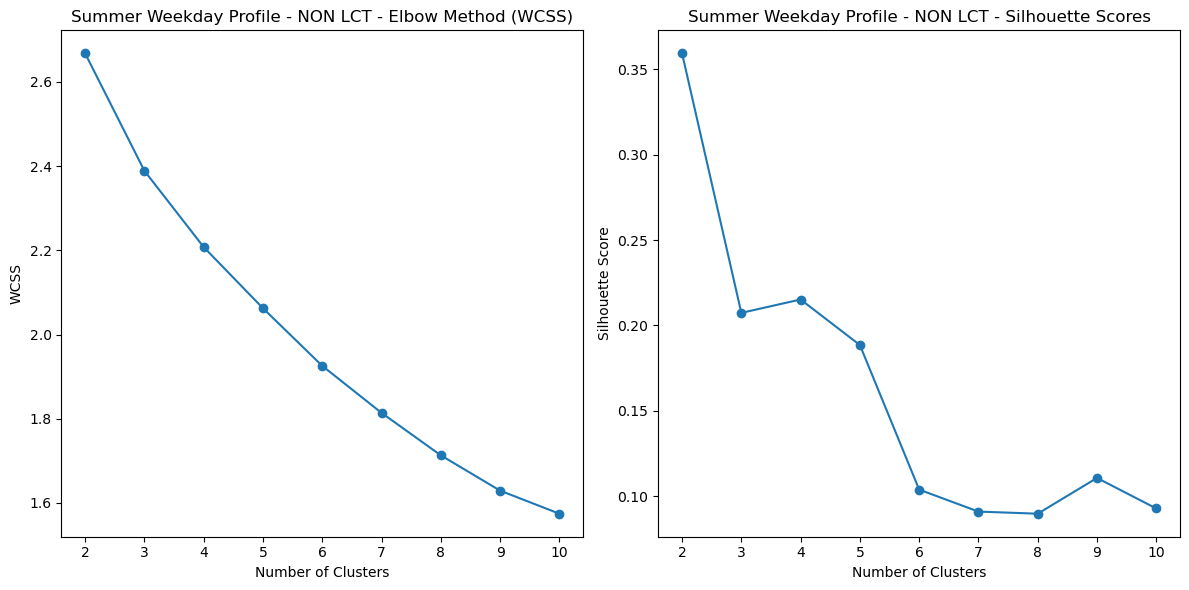

Optimal number of clusters for Summer Weekday Profile - NON LCT based on silhouette score: 2
Elbow and Silhouette Analysis for Winter Weekday Profile - NON LCT


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

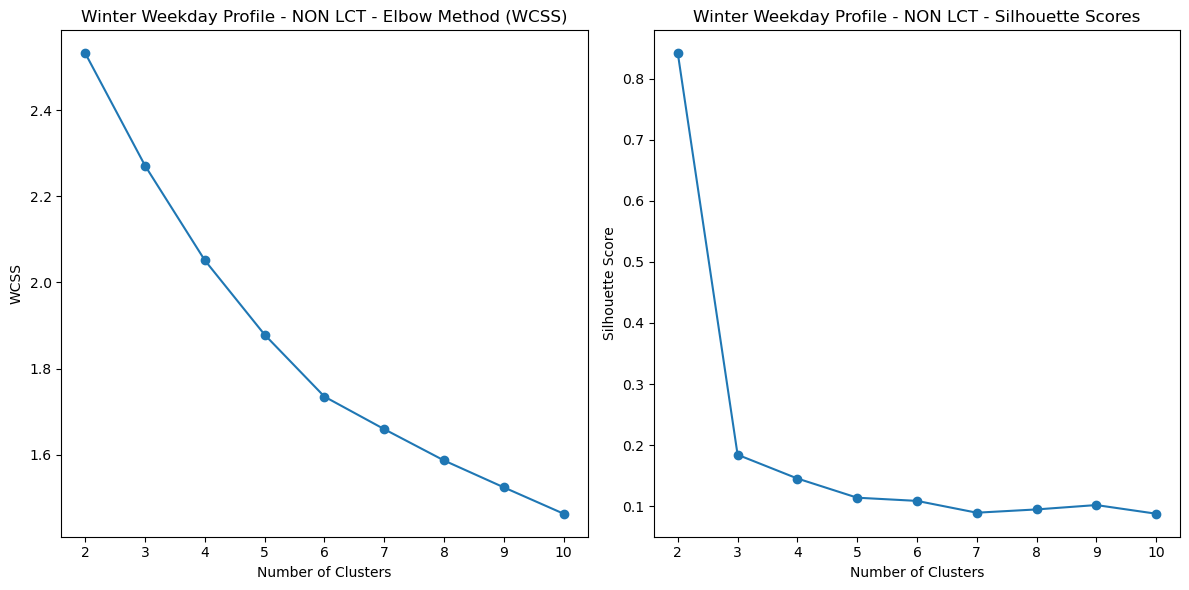

Optimal number of clusters for Winter Weekday Profile - NON LCT based on silhouette score: 2
Elbow and Silhouette Analysis for Yearly Weekday Profile - NON LCT


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

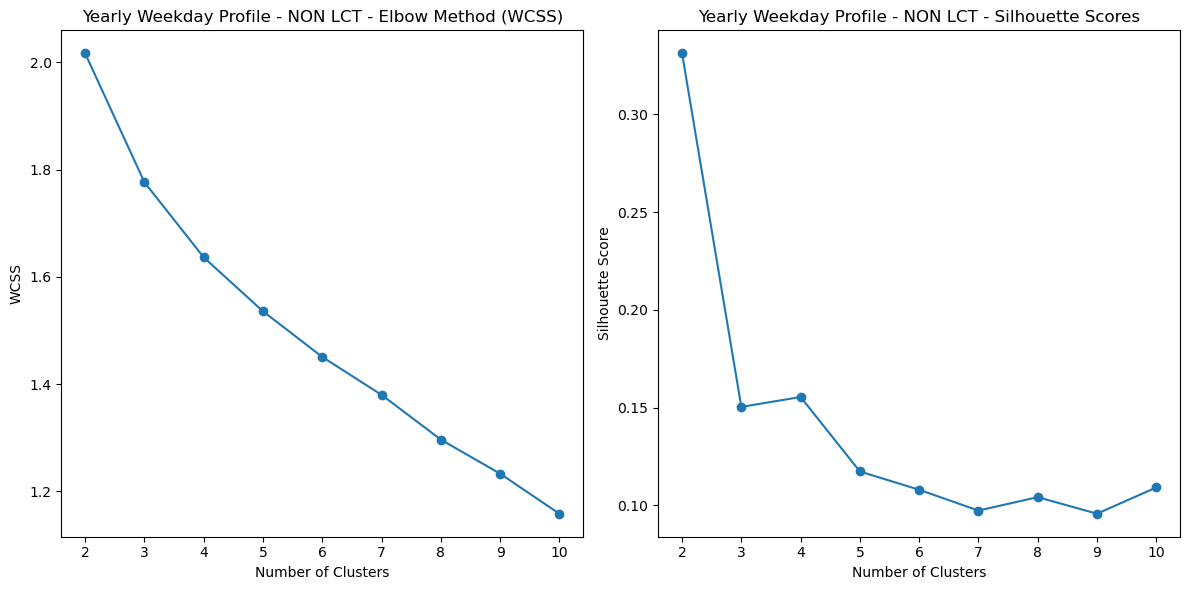

Optimal number of clusters for Yearly Weekday Profile - NON LCT based on silhouette score: 2
Cluster counts:
 Cluster
0    294
1     42
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0         285     9
1          42     0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


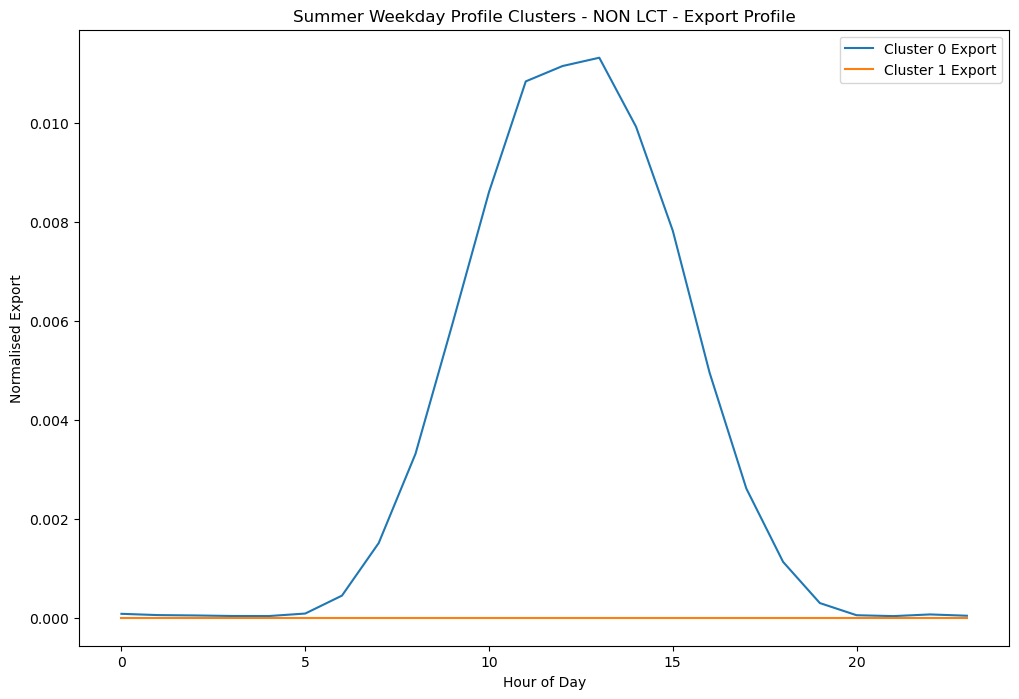

Clustering results saved to summer_weekday_clusters_NON LCT.csv
Cluster counts:
 Cluster
1    336
0      2
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0           2     0
1         326    10


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


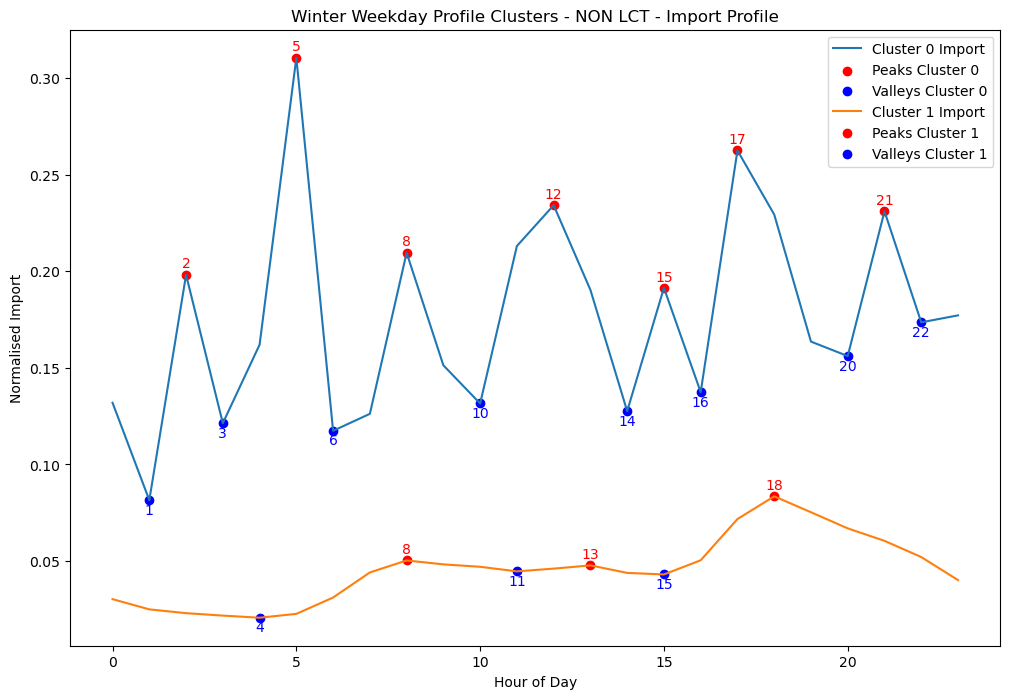

Clustering results saved to winter_weekday_clusters_NON LCT.csv
Cluster counts:
 Cluster
1    289
0     49
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0          49     0
1         279    10


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


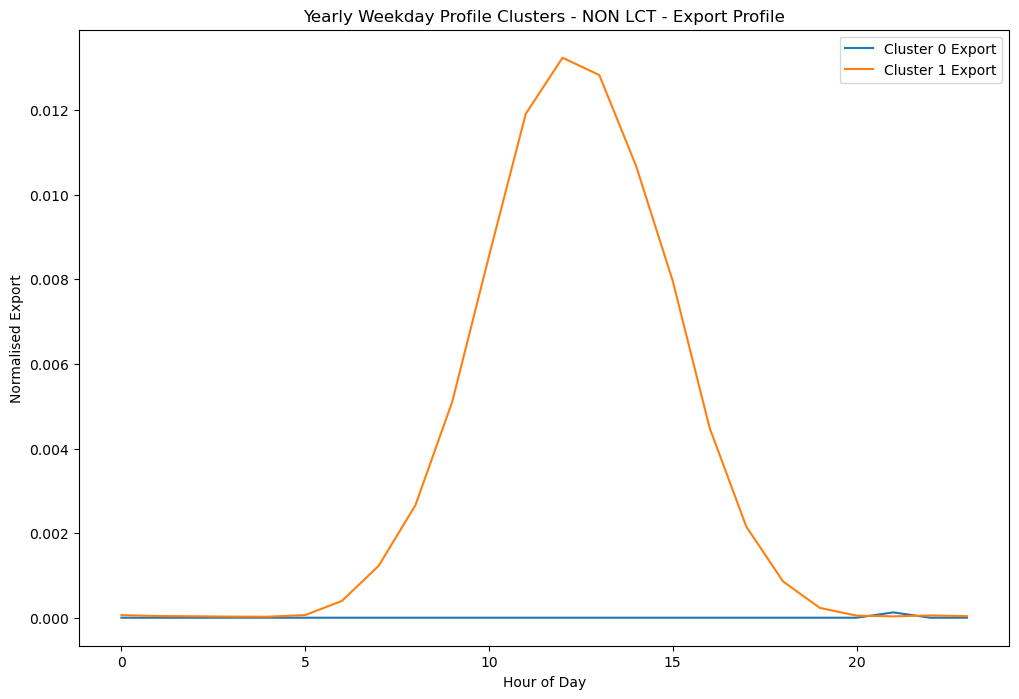

Clustering results saved to yearly_weekday_clusters_NON LCT.csv


/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active import (kW)'] = (df_con['Active import (W)'])/1000
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active export (kW)'] = (df_con['Active export (W)'])/1000
/Users/rahulsajithpillai/Desktop/Electricity Market Modelling/Data analysis/Paper_projects/pylibrary/NIE_data_cleaning.py:59

Index([14869470, 16113600], dtype='int64')
index location 143816
Preceding index position: 143815, Type: <class 'int'>
Succeeding index position: 143817, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 00:30:00'), Timedelta('0 days 02:30:00'))
Dropped row at index 14869470 as it did not meet the replacement criteria.
index location 166450
Preceding index position: 166449, Type: <class 'int'>
Succeeding index position: 166451, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 00:30:00'), Timedelta('0 days 02:00:00'))
Dropped row at index 16113600 as it did not meet the replacement criteria.
Elbow and Silhouette Analysis for Summer Weekday Profile - HEAT PUMP


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Optimal number of clusters for Summer Weekday Profile - HEAT PUMP based on silhouette score: 2
Elbow and Silhouette Analysis for Winter Weekday Profile - HEAT PUMP


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

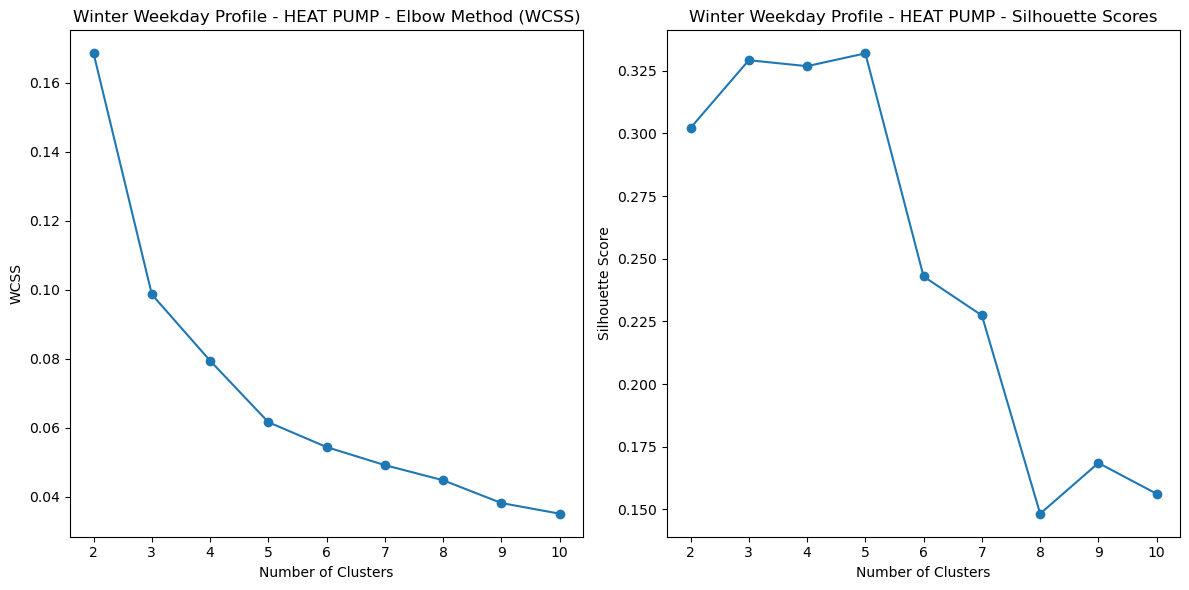

Optimal number of clusters for Winter Weekday Profile - HEAT PUMP based on silhouette score: 5
Elbow and Silhouette Analysis for Yearly Weekday Profile - HEAT PUMP


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

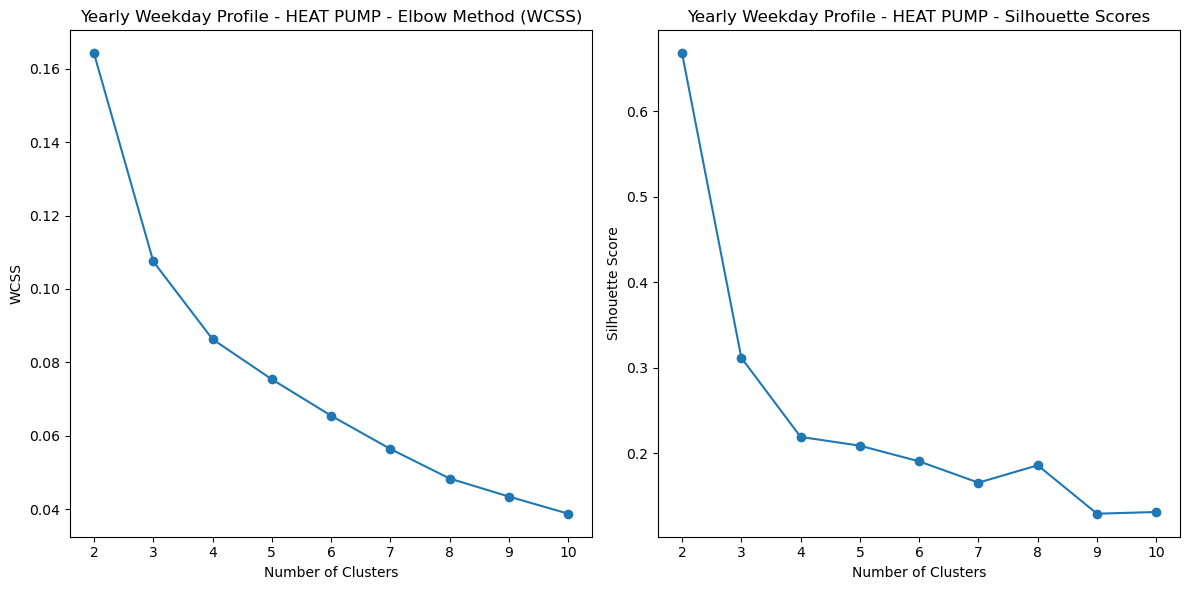

Optimal number of clusters for Yearly Weekday Profile - HEAT PUMP based on silhouette score: 2
Cluster counts:
 Cluster
0    29
1     1
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0          13    16
1           0     1


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


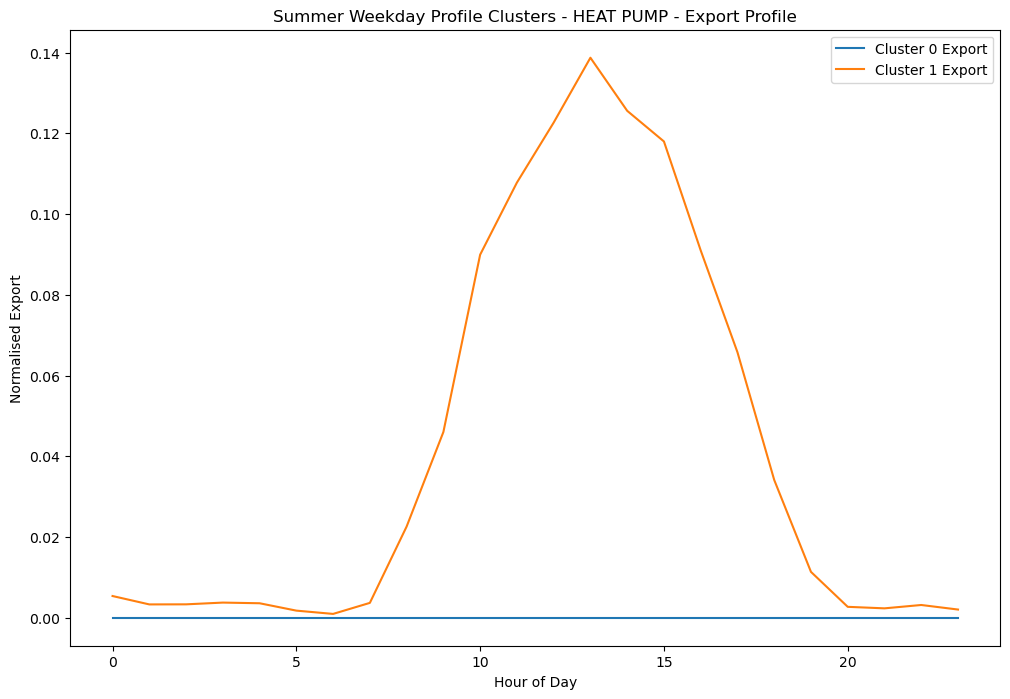

Clustering results saved to summer_weekday_clusters_HEAT PUMP.csv
Cluster counts:
 Cluster
1    15
0    15
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0          12     3
1           1    14


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


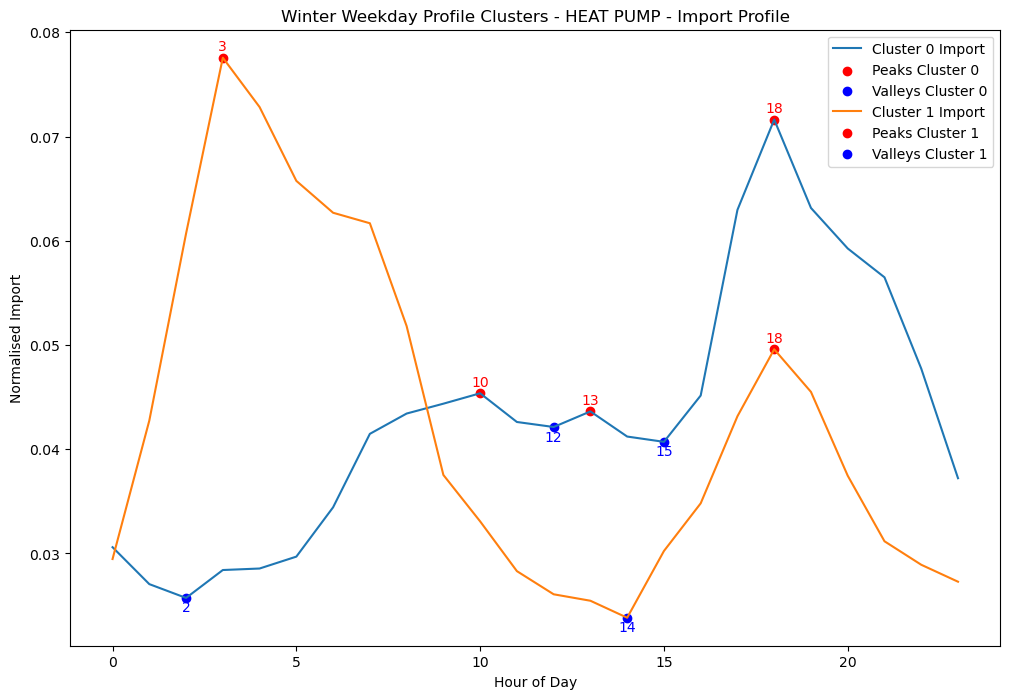

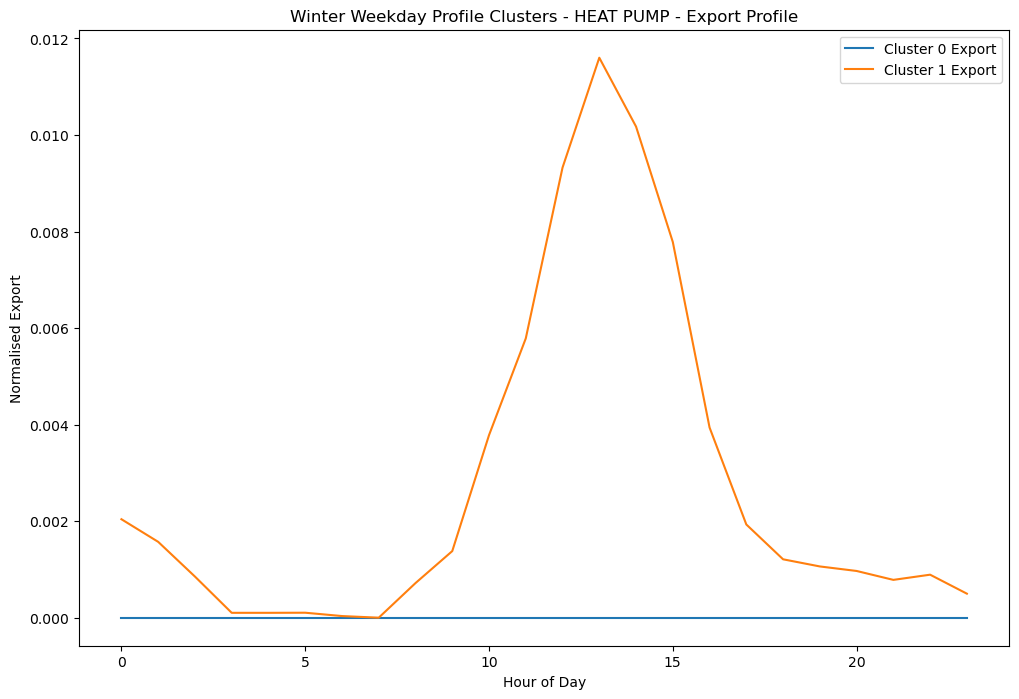

Clustering results saved to winter_weekday_clusters_HEAT PUMP.csv
Cluster counts:
 Cluster
0    29
1     1
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0          13    16
1           0     1


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


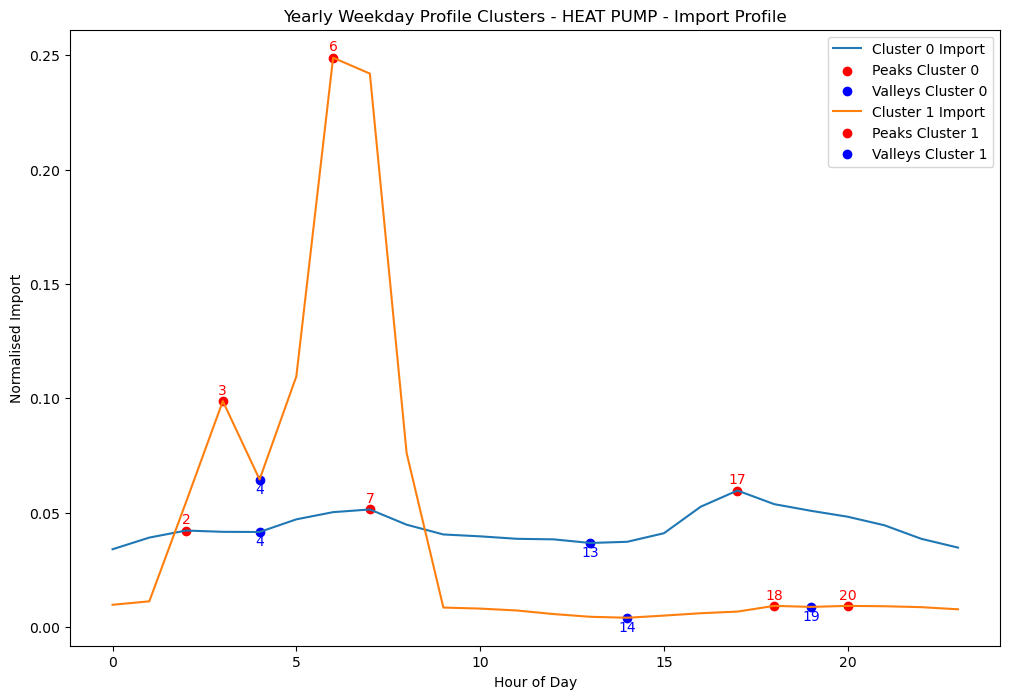

Clustering results saved to yearly_weekday_clusters_HEAT PUMP.csv


/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active import (kW)'] = (df_con['Active import (W)'])/1000
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active export (kW)'] = (df_con['Active export (W)'])/1000
/Users/rahulsajithpillai/Desktop/Electricity Market Modelling/Data analysis/Paper_projects/pylibrary/NIE_data_cleaning.py:59

Index([312581, 18134441, 20993869], dtype='int64')
index location 31593
Preceding index position: 31592, Type: <class 'int'>
Succeeding index position: 31594, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 03:30:00'), Timedelta('0 days 06:30:00'))
Dropped row at index 312581 as it did not meet the replacement criteria.
index location 1121238
Preceding index position: 1121237, Type: <class 'int'>
Succeeding index position: 1121239, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 04:00:00'), Timedelta('0 days 07:30:00'))
Dropped row at index 18134441 as it did not meet the replacement criteria.
index location 1277212
Preceding index position: 1277211, Type: <class 'int'>
Succeeding index position: 1277213, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 00:30:00'), Timedelta('0 days 02:00:00'))
Droppe

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

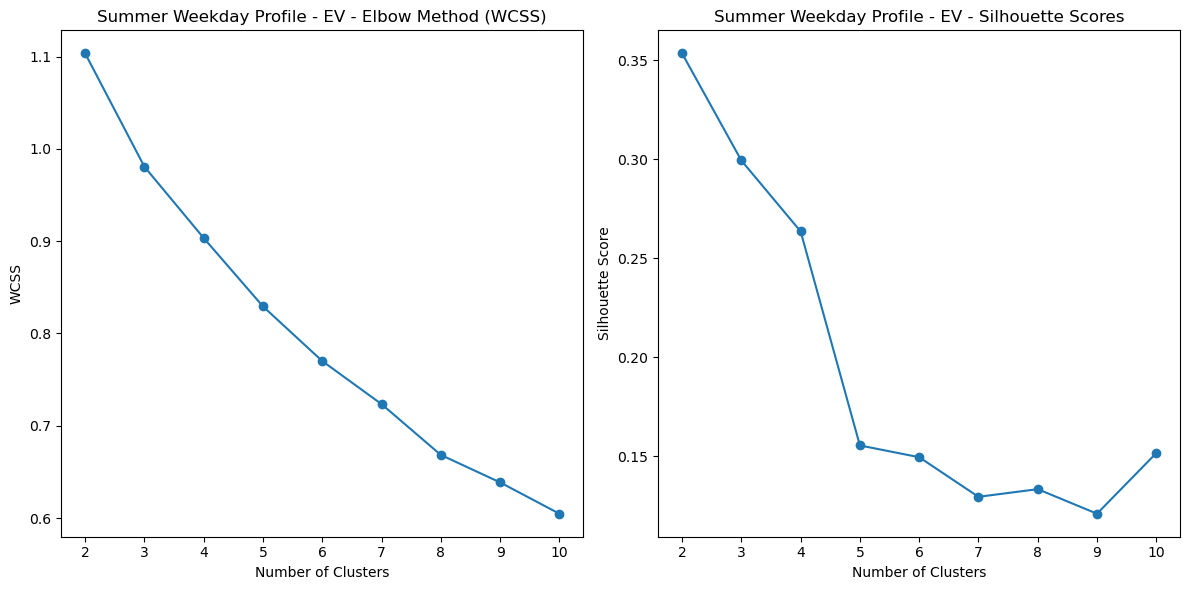

Optimal number of clusters for Summer Weekday Profile - EV based on silhouette score: 2
Elbow and Silhouette Analysis for Winter Weekday Profile - EV


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Optimal number of clusters for Winter Weekday Profile - EV based on silhouette score: 2
Elbow and Silhouette Analysis for Yearly Weekday Profile - EV


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Optimal number of clusters for Yearly Weekday Profile - EV based on silhouette score: 2
Cluster counts:
 Cluster
0    99
1    40
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0          85    14
1           4    36


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


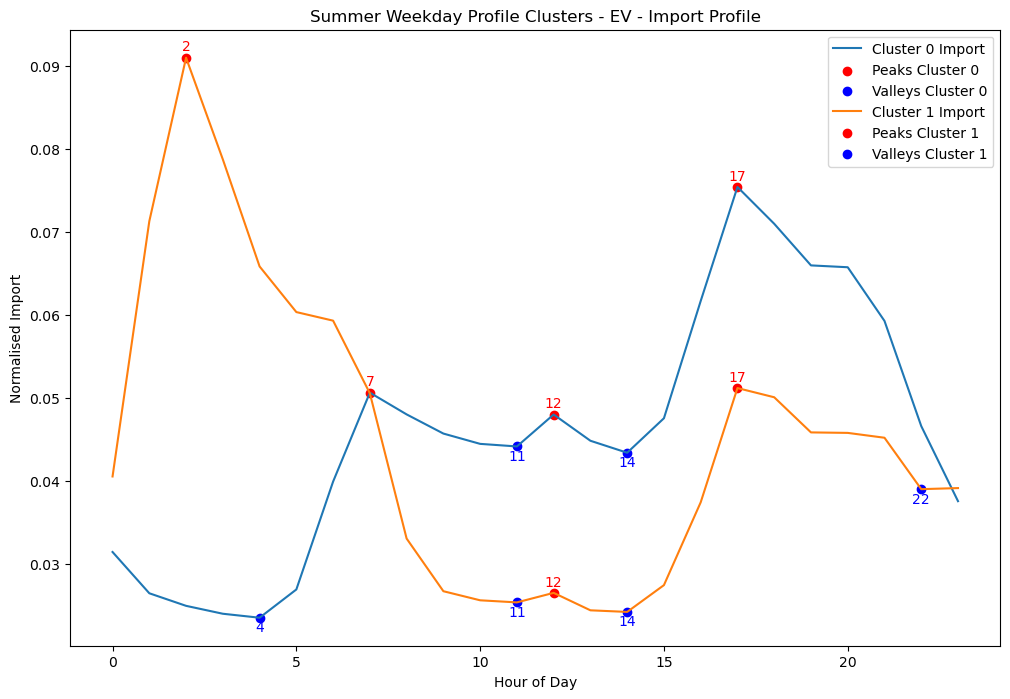

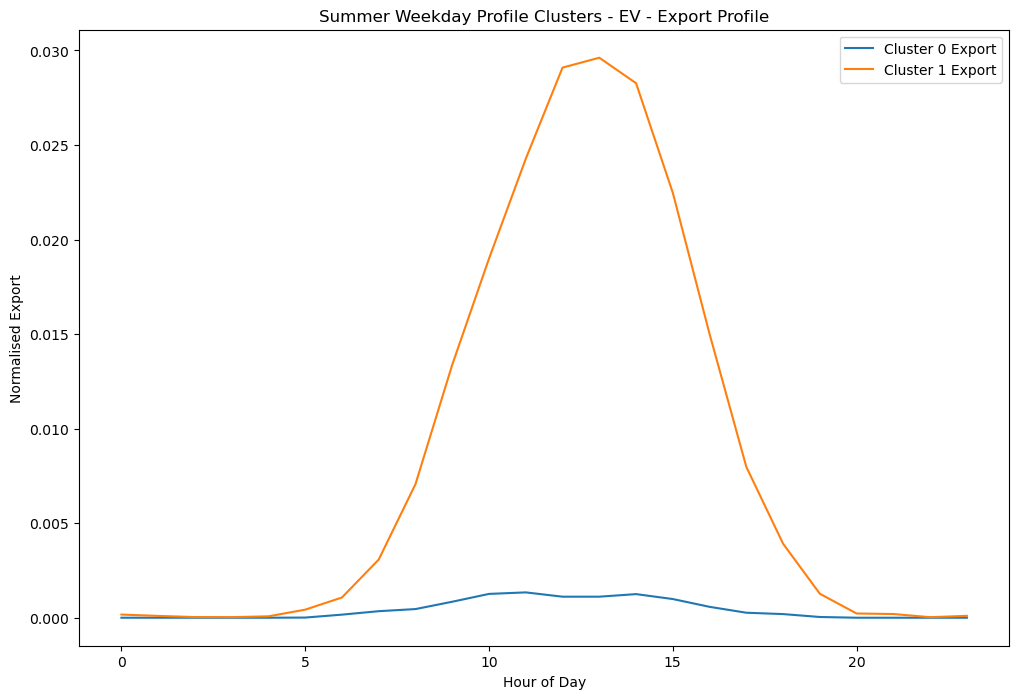

Clustering results saved to summer_weekday_clusters_EV.csv
Cluster counts:
 Cluster
0    106
1     35
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0          90    16
1           1    34


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


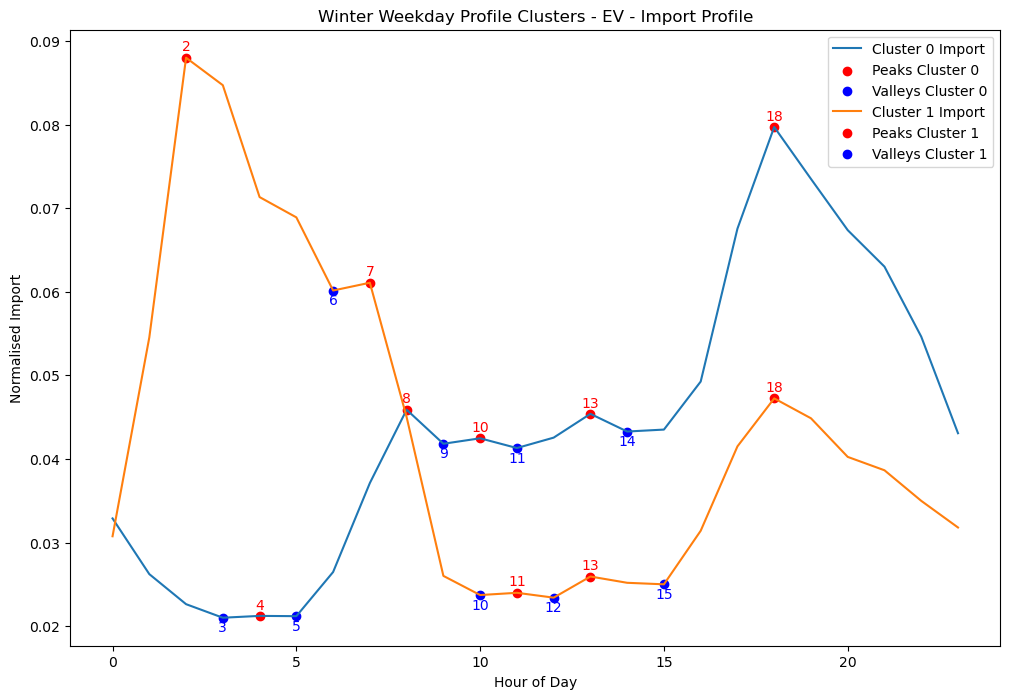

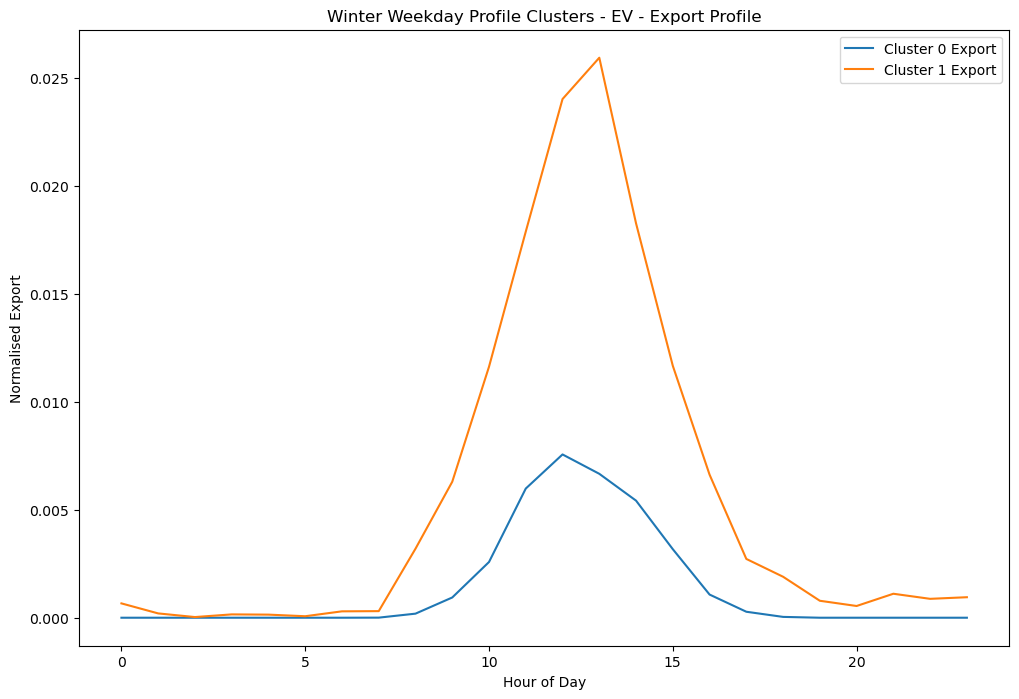

Clustering results saved to winter_weekday_clusters_EV.csv
Cluster counts:
 Cluster
1    103
0     38
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0           3    35
1          88    15


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


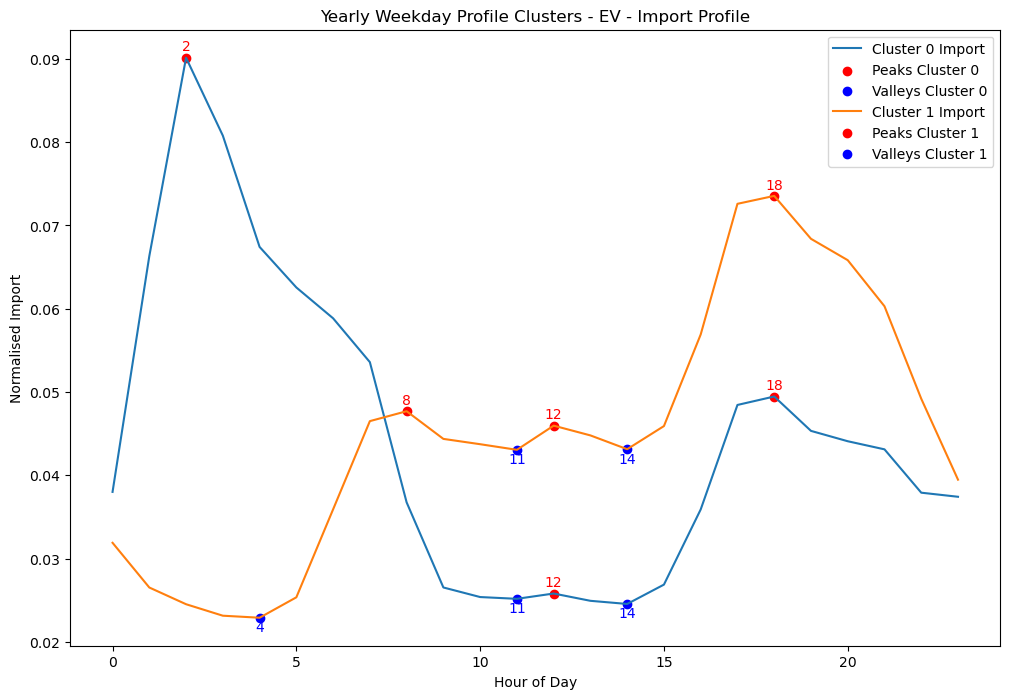

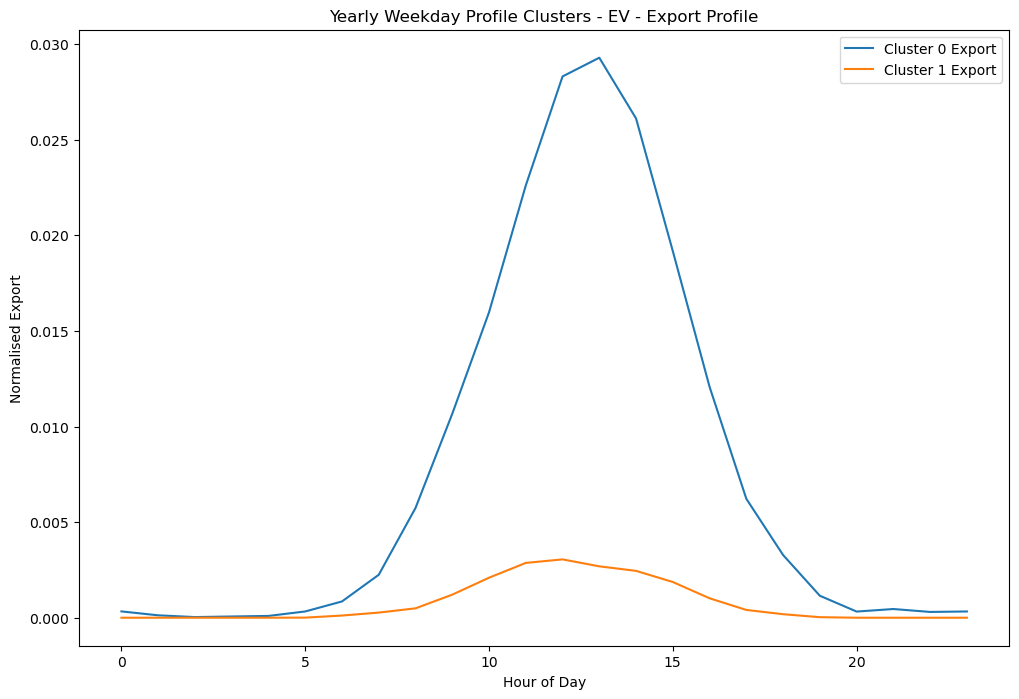

Clustering results saved to yearly_weekday_clusters_EV.csv


/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active import (kW)'] = (df_con['Active import (W)'])/1000
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active export (kW)'] = (df_con['Active export (W)'])/1000


Index([ 2202304,  3508564,  3863978,  3864090,  3864091,  3864092,  7389055,
        8452385, 11870639, 14541571, 14740189, 14939273, 15130391, 15483565,
       16047192],
      dtype='int64')
index location 160572
Preceding index position: 160571, Type: <class 'int'>
Succeeding index position: 160573, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 01:00:00'), Timedelta('0 days 02:30:00'))
Dropped row at index 2202304 as it did not meet the replacement criteria.
index location 390145
Preceding index position: 390144, Type: <class 'int'>
Succeeding index position: 390146, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 00:30:00'), Timedelta('0 days 09:00:00'))
Dropped row at index 3508564 as it did not meet the replacement criteria.
index location 462288
Preceding index position: 462287, Type: <class 'int'>
Succeeding index position: 462289, Type: <class 'int'>


/Users/rahulsajithpillai/Desktop/Electricity Market Modelling/Data analysis/Paper_projects/pylibrary/NIE_data_cleaning.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(index=indices_to_drop, inplace=True)
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Month'] = df_con['DateTime'].dt.month
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Elbow and Silhouette Analysis for Summer Weekday Profile - PV


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

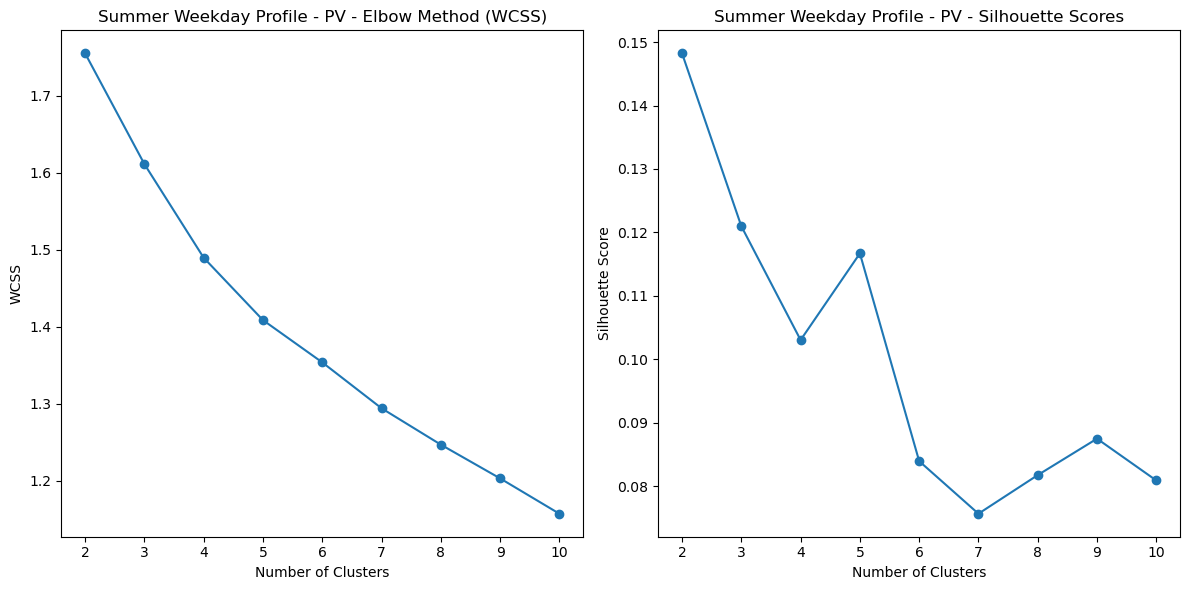

Optimal number of clusters for Summer Weekday Profile - PV based on silhouette score: 2
Elbow and Silhouette Analysis for Winter Weekday Profile - PV


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

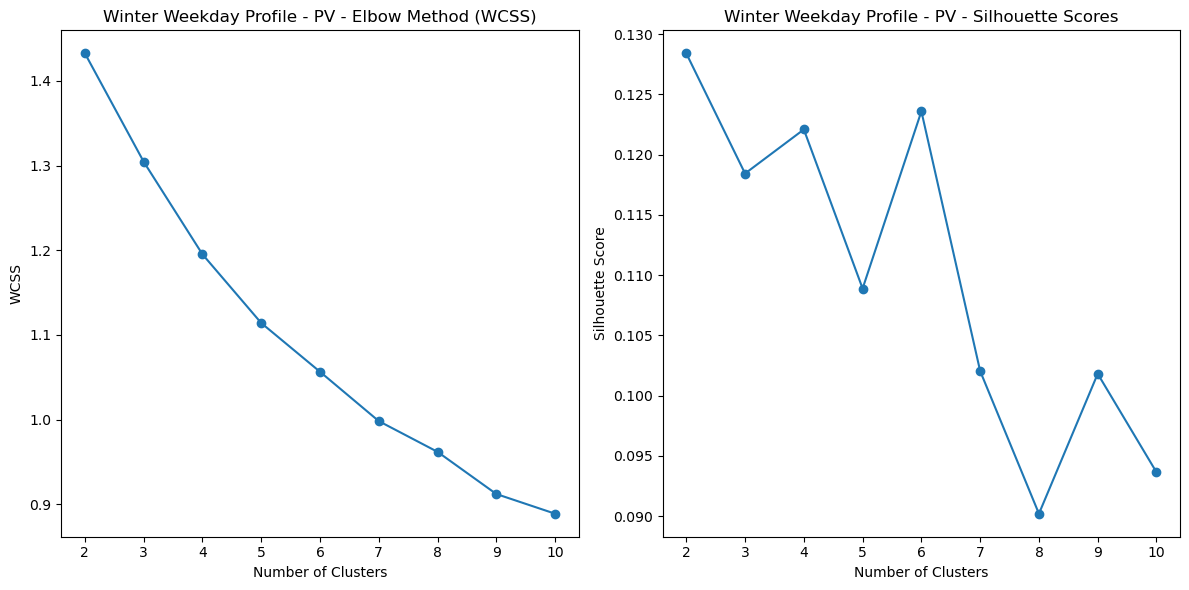

Optimal number of clusters for Winter Weekday Profile - PV based on silhouette score: 2
Elbow and Silhouette Analysis for Yearly Weekday Profile - PV


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

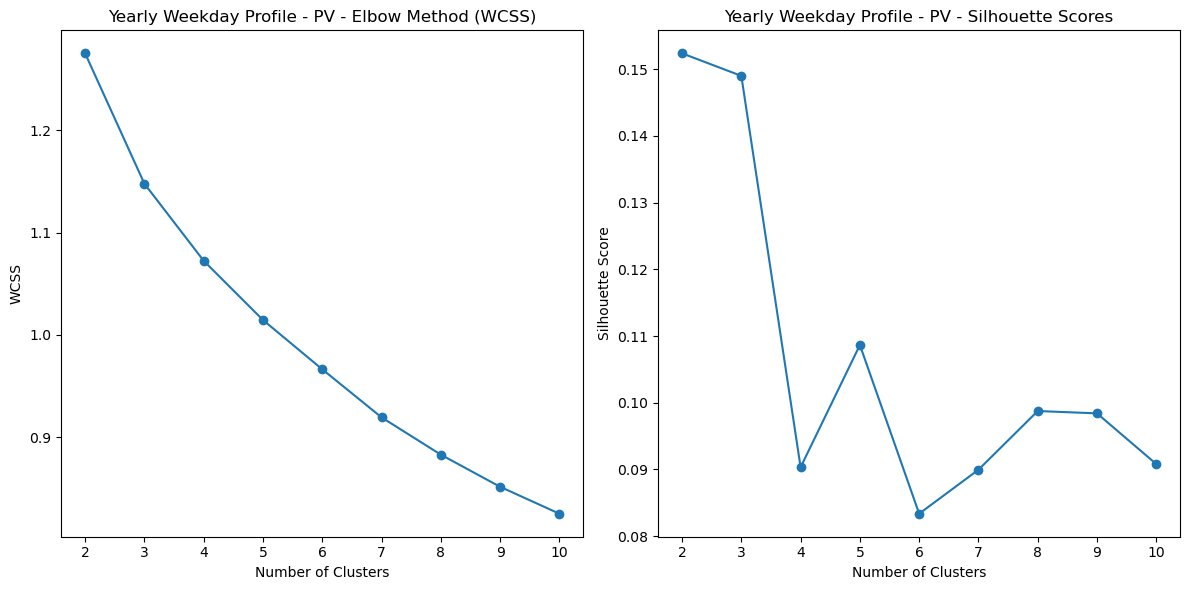

Optimal number of clusters for Yearly Weekday Profile - PV based on silhouette score: 2
Cluster counts:
 Cluster
0    126
1    119
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0         123     3
1         115     4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


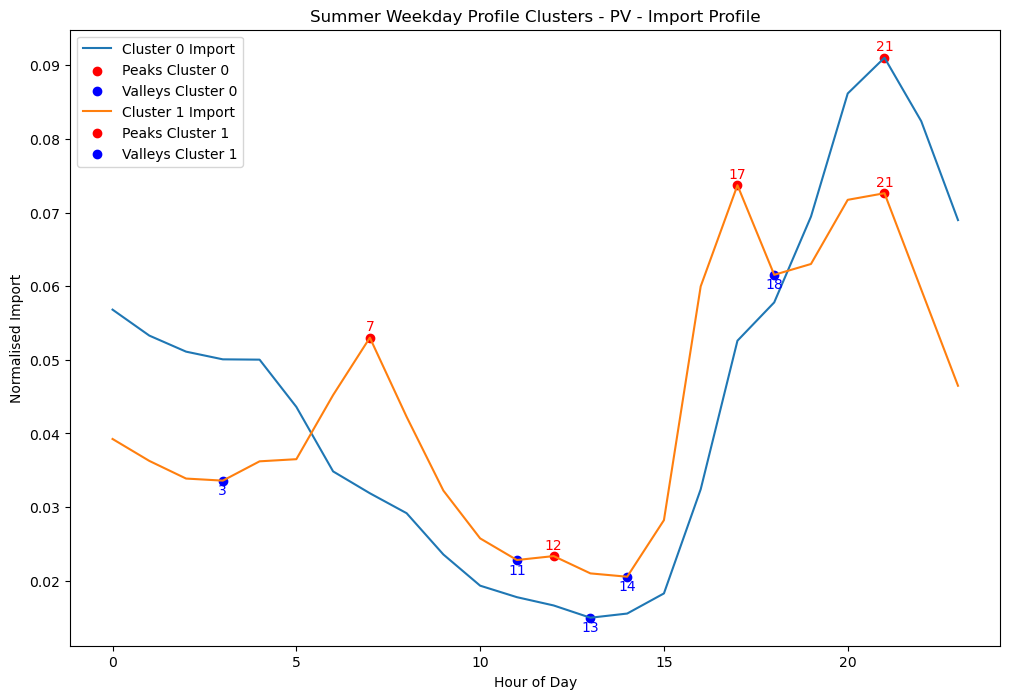

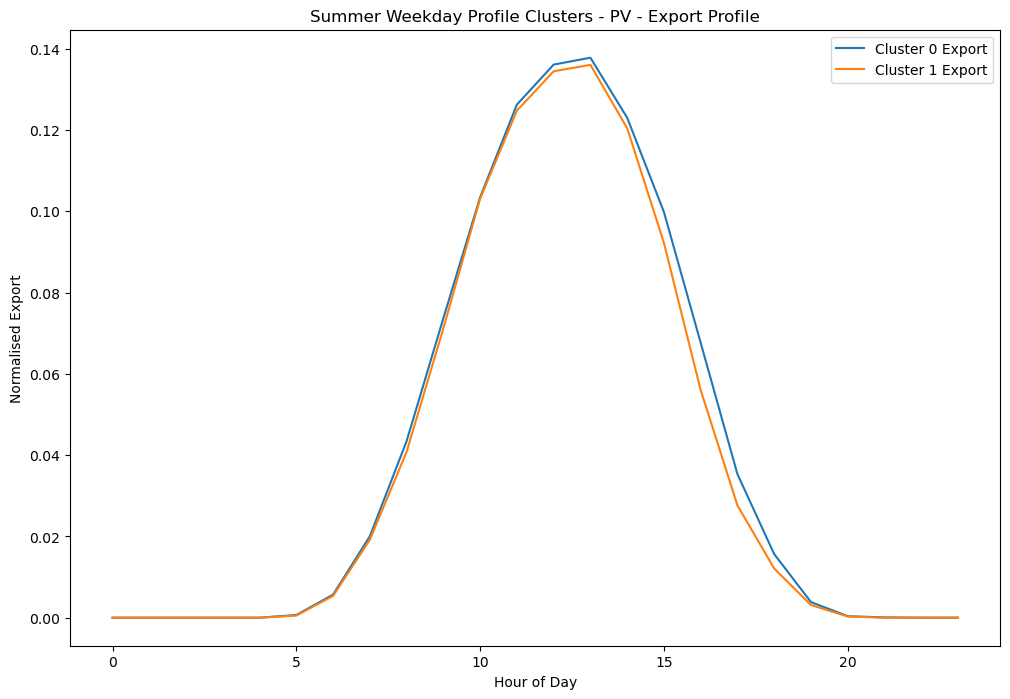

Clustering results saved to summer_weekday_clusters_PV.csv
Cluster counts:
 Cluster
1    127
0    118
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0         116     2
1         122     5


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


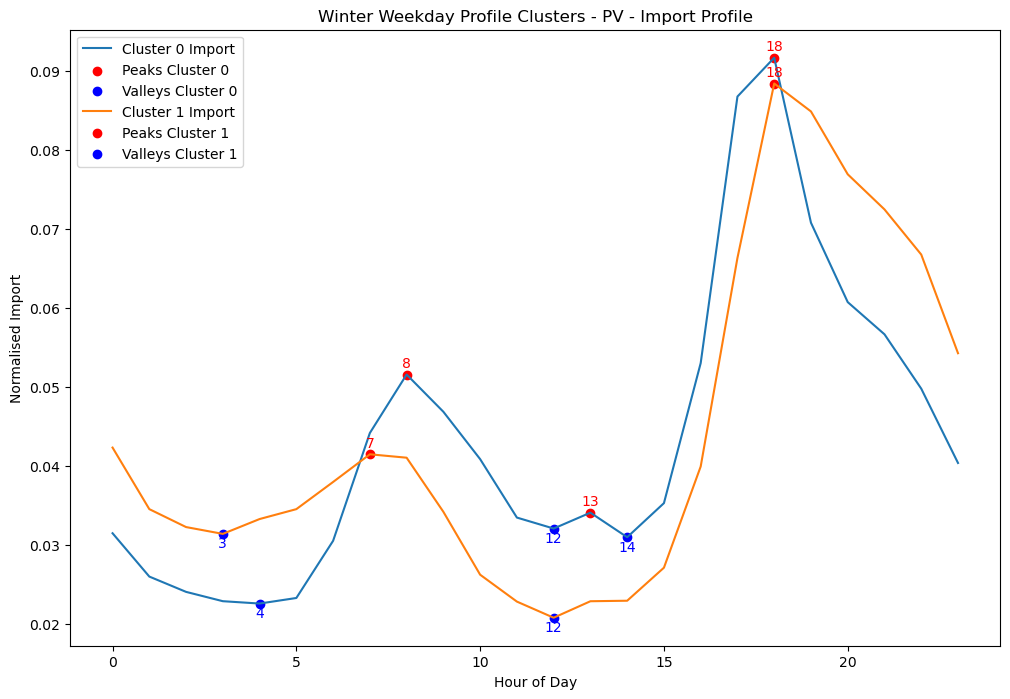

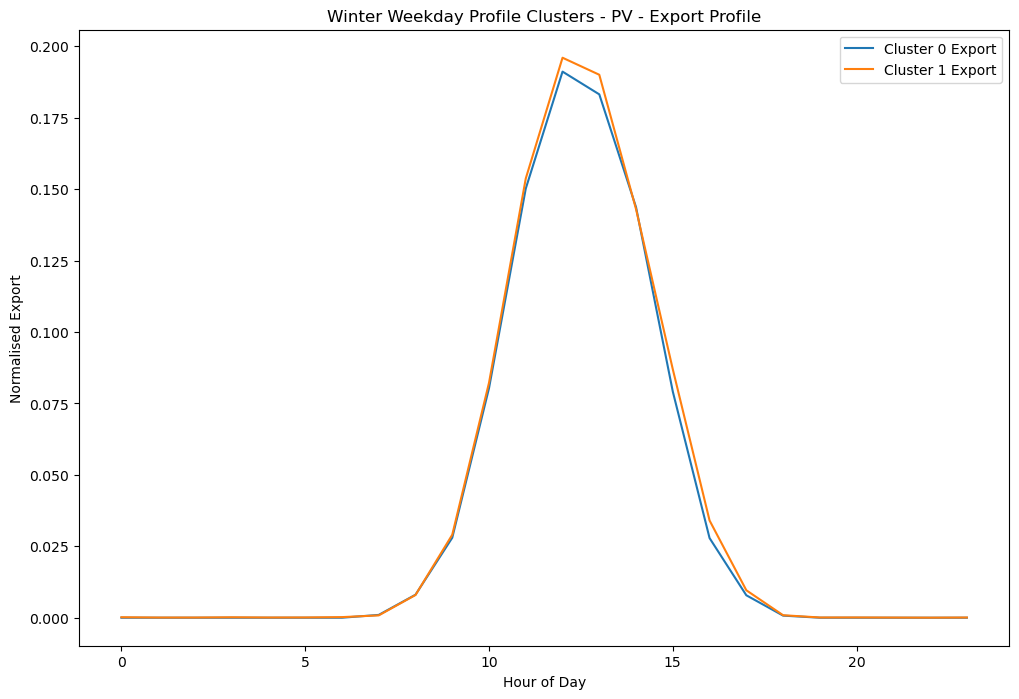

Clustering results saved to winter_weekday_clusters_PV.csv
Cluster counts:
 Cluster
0    126
1    119
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0         123     3
1         115     4


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


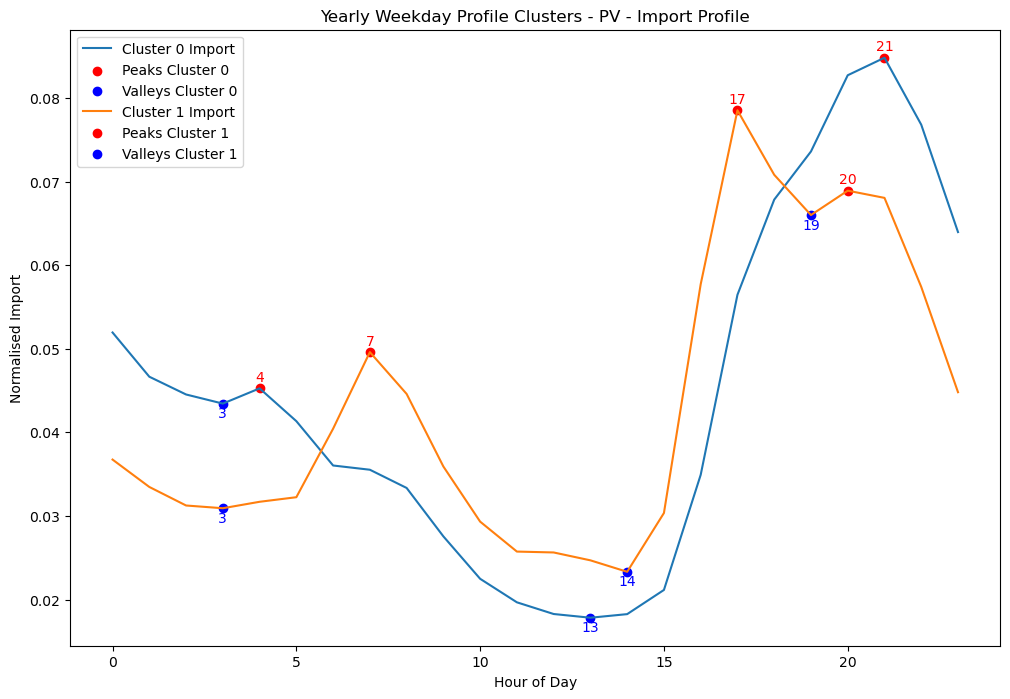

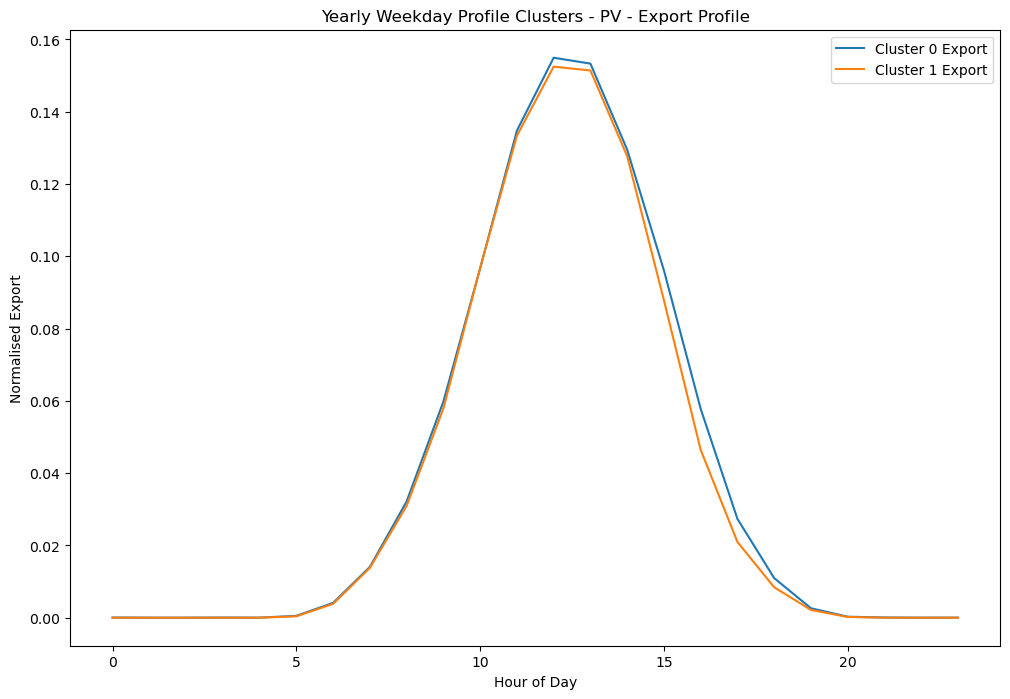

Clustering results saved to yearly_weekday_clusters_PV.csv


/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active import (kW)'] = (df_con['Active import (W)'])/1000
/var/folders/tp/rwv1kfh92_3ddcwckkhz8qjc0000gn/T/ipykernel_62300/2631314550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_con['Active export (kW)'] = (df_con['Active export (W)'])/1000
/Users/rahulsajithpillai/Desktop/Electricity Market Modelling/Data analysis/Paper_projects/pylibrary/NIE_data_cleaning.py:59

Index([21513507, 22243518], dtype='int64')
index location 617820
Preceding index position: 617819, Type: <class 'int'>
Succeeding index position: 617821, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 met. Time differences = (Timedelta('0 days 00:30:00'), Timedelta('0 days 00:30:00'))
Replaced anomalous value at index 21513507 with mean of 0.28 and 0.0
index location 680071
Preceding index position: 680070, Type: <class 'int'>
Succeeding index position: 680072, Type: <class 'int'>
Condition 1 met
Condition 2 met
Condition 3 not met. Time differences = (Timedelta('0 days 00:30:00'), Timedelta('0 days 03:00:00'))
Dropped row at index 22243518 as it did not meet the replacement criteria.
Elbow and Silhouette Analysis for Summer Weekday Profile - EV|HEAT PUMP


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

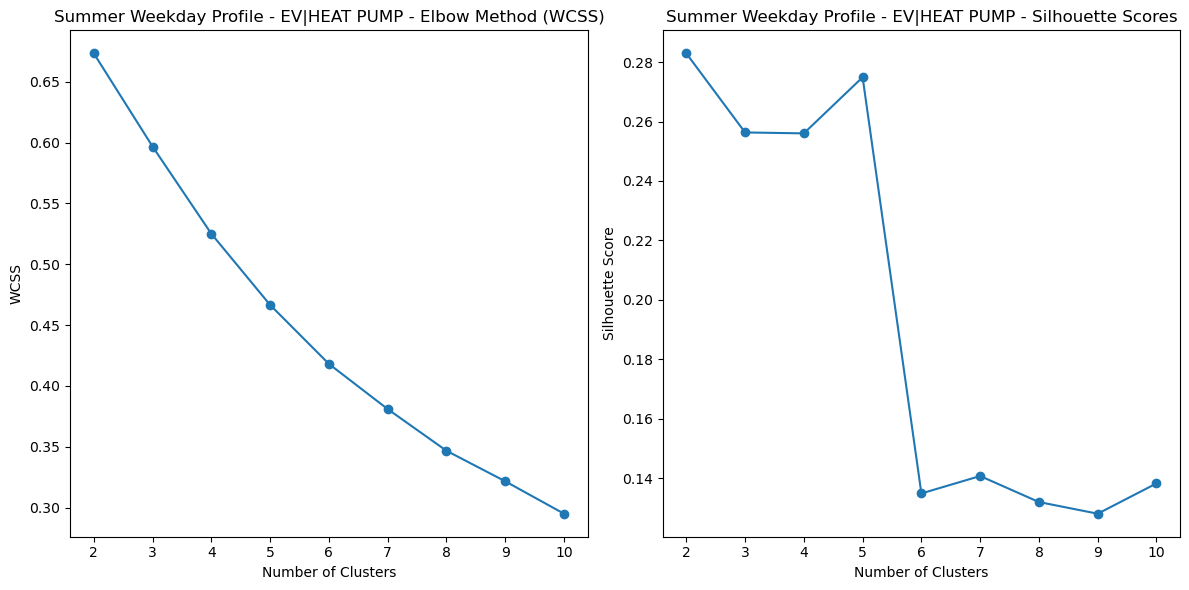

Optimal number of clusters for Summer Weekday Profile - EV|HEAT PUMP based on silhouette score: 2
Elbow and Silhouette Analysis for Winter Weekday Profile - EV|HEAT PUMP


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

Optimal number of clusters for Winter Weekday Profile - EV|HEAT PUMP based on silhouette score: 2
Elbow and Silhouette Analysis for Yearly Weekday Profile - EV|HEAT PUMP


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

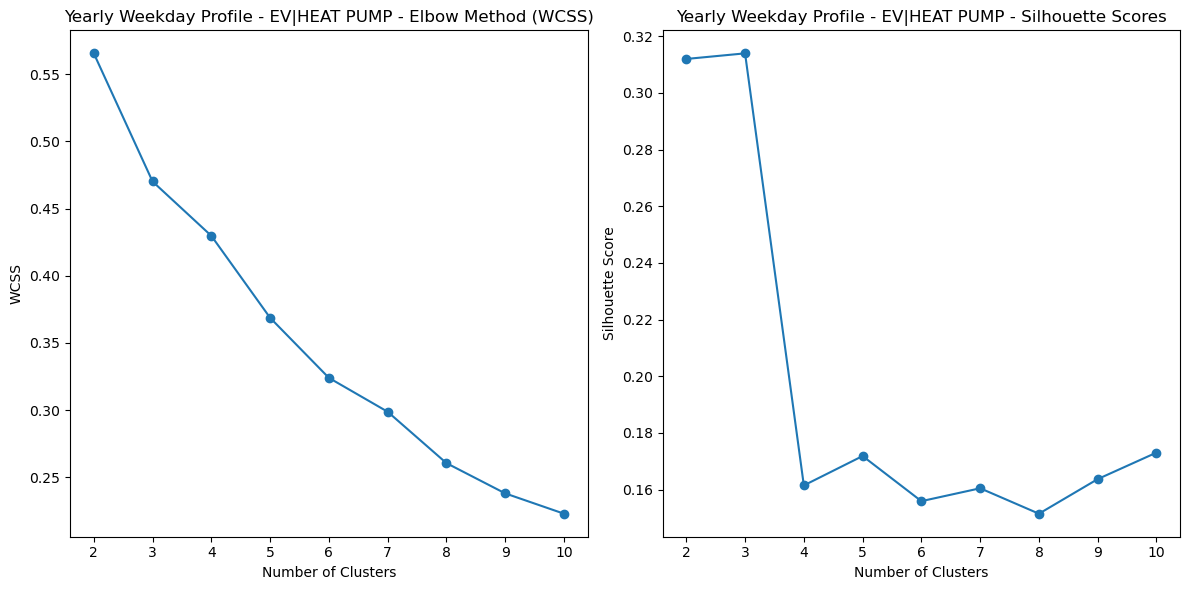

Optimal number of clusters for Yearly Weekday Profile - EV|HEAT PUMP based on silhouette score: 3
Cluster counts:
 Cluster
1    45
0    25
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0           0    25
1          34    11


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


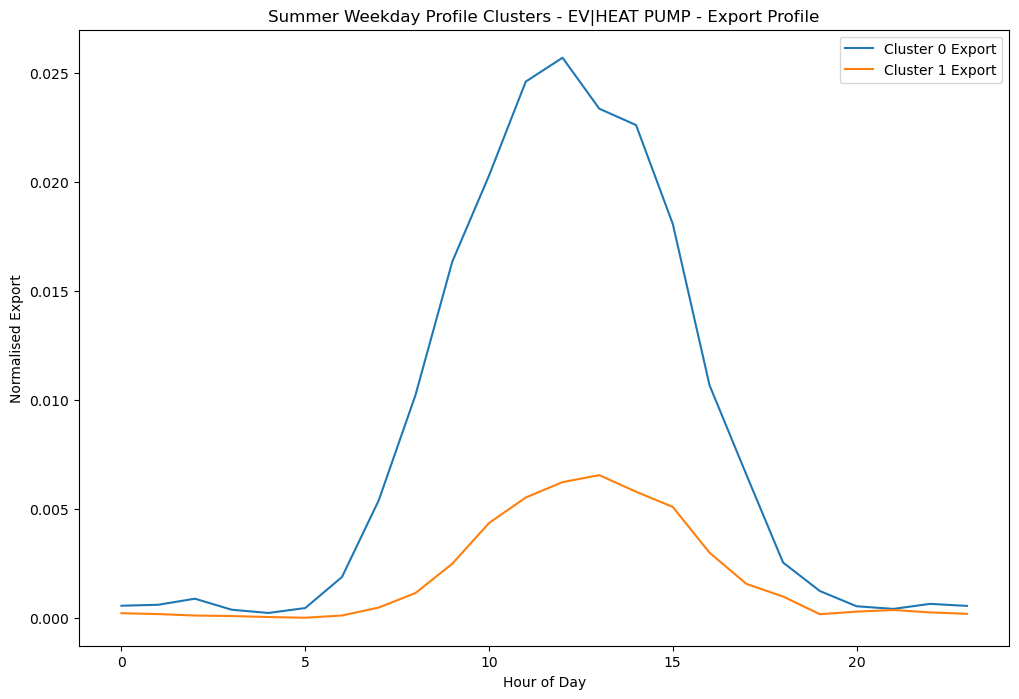

Clustering results saved to summer_weekday_clusters_EV|HEAT PUMP.csv
Cluster counts:
 Cluster
1    46
0    25
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0           0    25
1          35    11


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


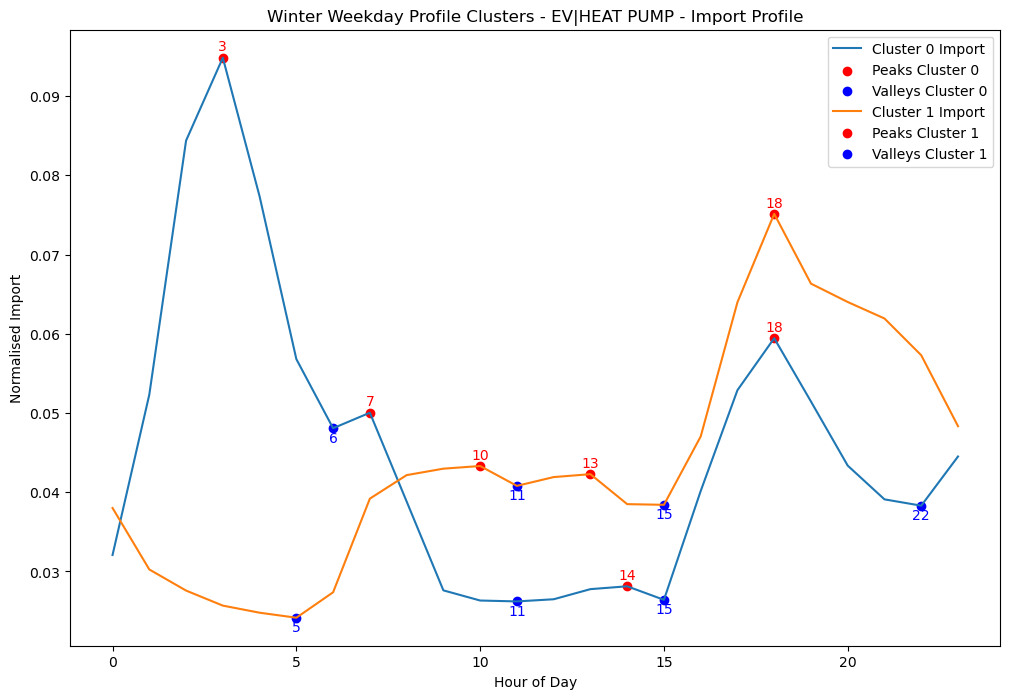

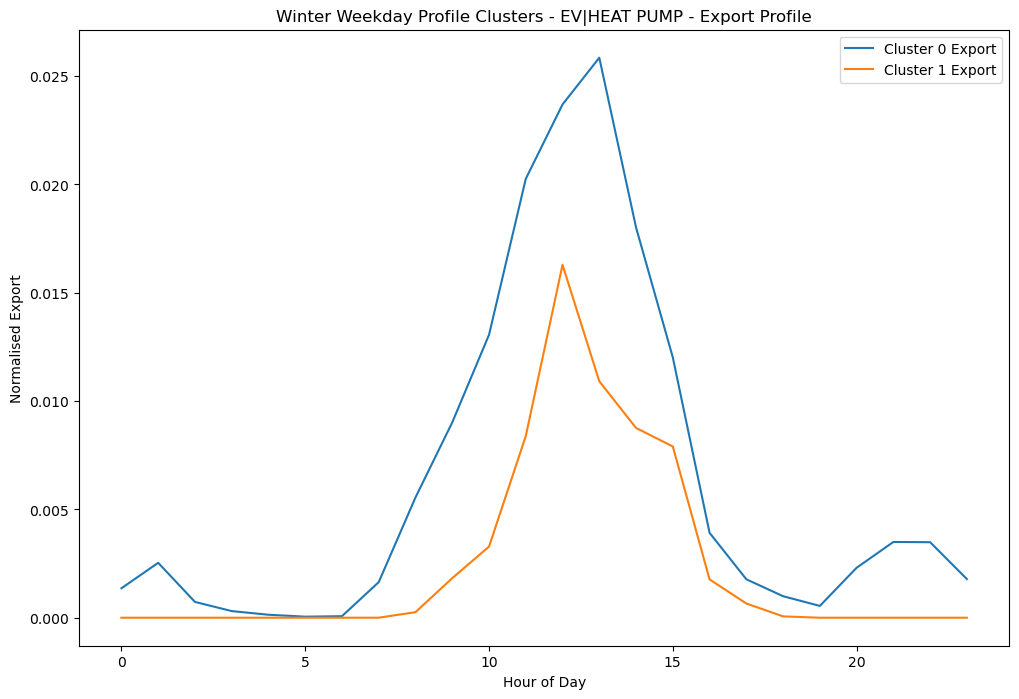

Clustering results saved to winter_weekday_clusters_EV|HEAT PUMP.csv
Cluster counts:
 Cluster
0    44
1    26
2     1
Name: count, dtype: int64
Tariff counts per cluster:
Tariff   T011  T012
Cluster            
0          35     9
1           0    26
2           0     1


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


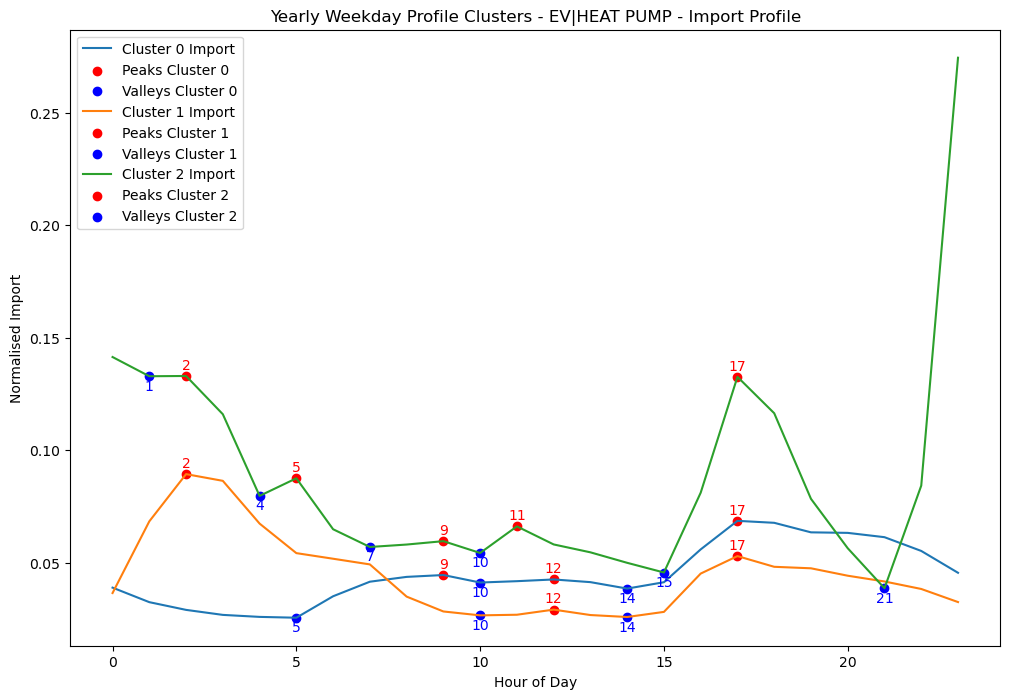

In [ ]:
all_resampled = []
all_yearly_clusters = []
all_lct_info = []
for tech_type in tech_types:
    df_con = df[df['LCT Type']==tech_type]
    df_con['Active import (kW)'] = (df_con['Active import (W)'])/1000
    df_con['Active export (kW)'] = (df_con['Active export (W)'])/1000
    
    df_con = clean(df_con)
    df_con['Month'] = df_con['DateTime'].dt.month
    df_con['Hour'] = df_con['DateTime'].dt.hour
    df_con['YearMonth'] = df_con['DateTime'].dt.to_period('M')
    
    df_con.set_index('DateTime', inplace=True)
    
    numeric_columns = ['Active export (W)', 'Active import (W)', 'Reactive export (Var)', 'Reactive import (Var)', 'Active import (kW)', 'Active export (kW)']
    string_columns = ['LCT Type', 'Tariff', 'Profile', 'Month', 'Hour', 'YearMonth']
    
    resampled_numeric = df_con.groupby('Profile')[numeric_columns].resample('H').mean().reset_index(level=0, drop=True)
    resampled_string = df_con.groupby('Profile')[string_columns].resample('H').first().reset_index(level=0, drop=True)
    resampled_df_con = pd.concat([resampled_numeric, resampled_string], axis=1).dropna()
    resampled_df_con.to_csv(f"resampled_df_con {tech_type}.csv")

    summer_months = [4, 5, 6, 7, 8, 9, 10]
    winter_months = [11, 12, 1, 2, 3]

    resampled_df_con = nd(resampled_df_con)
    resampled_df_con = resampled_df_con.dropna()

    resampled_df_con['Season'] = np.where(resampled_df_con.index.month.isin(summer_months), 'Summer', 'Winter')
    resampled_df_con['DayType'] = resampled_df_con.index.weekday.map(lambda x:'Weekday' if x <5 else 'Weekend')
    tariff_info = resampled_df_con[['Profile', 'Tariff']].drop_duplicates().set_index('Profile')

    summer_weekday_profile = dp(resampled_df_con, season='Summer', day_type='Weekday', tariff_info = tariff_info)
    winter_weekday_profile = dp(resampled_df_con, season='Winter', day_type='Weekday', tariff_info = tariff_info)
    yearly_weekday_profile = dp(resampled_df_con, day_type='Weekday', tariff_info = tariff_info)

    print(f"Elbow and Silhouette Analysis for Summer Weekday Profile - {tech_type}")
    sum_cls = esil(summer_weekday_profile, max_clusters=10, title=f"Summer Weekday Profile - {tech_type}")

    print(f"Elbow and Silhouette Analysis for Winter Weekday Profile - {tech_type}")
    wint_cls = esil(winter_weekday_profile, max_clusters=10, title=f"Winter Weekday Profile - {tech_type}")

    print(f"Elbow and Silhouette Analysis for Yearly Weekday Profile - {tech_type}")
    yearly_cls = esil(yearly_weekday_profile, max_clusters=10, title=f"Yearly Weekday Profile - {tech_type}")


    kmeans_summer, summer_clusters = cls(
    summer_weekday_profile, 
    num_clusters=sum_cls,  # Adjust based on elbow plot
    title=f"Summer Weekday Profile Clusters - {tech_type}", 
    output_csv=f"summer_weekday_clusters_{tech_type}.csv"
)

# Cluster based on winter weekday profile
    kmeans_winter, winter_clusters = cls(
        winter_weekday_profile, 
        num_clusters=2,  # Adjust based on elbow plot
        title=f"Winter Weekday Profile Clusters - {tech_type}", 
        output_csv=f"winter_weekday_clusters_{tech_type}.csv"
    )
    
    # Cluster based on yearly weekday profile
    kmeans_yearly, yearly_clusters = cls(
        yearly_weekday_profile, 
        num_clusters=yearly_cls,  # Adjust based on elbow plot
        title=f"Yearly Weekday Profile Clusters - {tech_type}", 
        output_csv=f"yearly_weekday_clusters_{tech_type}.csv"
    )
    resampled_df_con['Tech_Type'] = tech_type
    all_resampled.append(resampled_df_con)

    lct_info = resampled_df_con[['Profile', 'LCT Type']].drop_duplicates()
    all_lct_info.append(lct_info)
    if 'Profile' not in yearly_clusters.columns:
        yearly_clusters = yearly_clusters.reset_index()

    yearly_clusters['Tech_Type'] = tech_type
    all_yearly_clusters.append(yearly_clusters)
combined_df_con = pd.concat(all_resampled)
combined_clusters = pd.concat(all_yearly_clusters, ignore_index=True)
combined_lct_info = pd.concat(all_lct_info).drop_duplicates()
        
        

In [ ]:
monthly_totals = combined_df_con.groupby(['Profile', pd.Grouper(freq='M')])[
    'Active import (kW)'
].sum().reset_index()
monthly_totals.rename(columns={'DateTime': 'Month'}, inplace=True)

In [ ]:
combined_df_con['Profile'].nunique()

944

In [ ]:
print(all_yearly_clusters[0].index.name)

None


In [ ]:
combined_clusters

Profile  Import_Hour_0  Import_Hour_1  Import_Hour_2  Import_Hour_3  \
0       Profile_1       0.023261       0.016819       0.019775       0.018792   
1     Profile_101       0.034977       0.031010       0.032989       0.034160   
2    Profile_1016       0.030486       0.028017       0.030879       0.042611   
3     Profile_105       0.016896       0.012192       0.010969       0.009794   
4     Profile_108       0.027369       0.020491       0.013448       0.009855   
..            ...            ...            ...            ...            ...   
936    Profile_91       0.009222       0.057192       0.122915       0.098448   
937   Profile_943       0.032078       0.067096       0.089591       0.094499   
938   Profile_950       0.027123       0.094588       0.108501       0.100647   
939   Profile_968       0.038432       0.037407       0.034984       0.034625   
940   Profile_995       0.060774       0.085091       0.081547       0.084403   

     Import_Hour_4  Import_Hour_5  Import_Hour_6  Import_Hour_7  \
0         0.022690       0.021788       0.114974       0.087953   
1         0.032295       0.045322       0.051705       0.048544   
2         0.071727       0.058959       0.043203       0.048809   
3         0.009889       0.010364       0.019775       0.058059   
4         0.009317       0.015321       0.036187       0.060899   
..             ...            ...            ...            ...   
936       0.084861       0.065826       0.078818       0.067290   
937       0.083250       0.138012       0.104104       0.081454   
938       0.088970       0.066089       0.064387       0.060338   
939       0.035813       0.034154       0.148131       0.098636   
940       0.086303       0.066436       0.064918       0.051816   

     Import_Hour_8  ...  Export_Hour_17  Export_Hour_18  Export_Hour_19  \
0         0.067670  ...        0.000000        0.000000        0.000000   
1         0.045221  ...        0.000000        0.000000        0.000000   
2         0.057022  ...        0.000000        0.000000        0.000000   
3         0.056040  ...        0.000000        0.000000        0.000000   
4         0.056858  ...        0.000000        0.000000        0.000000   
..             ...  ...             ...             ...             ...   
936       0.036334  ...        0.027274        0.025480        0.020502   
937       0.032303  ...        0.069144        0.045592        0.025986   
938       0.022726  ...        0.009874        0.003165        0.000671   
939       0.024650  ...        0.032426        0.013396        0.001830   
940       0.037069  ...        0.062685        0.022841        0.009585   

     Export_Hour_20  Export_Hour_21  Export_Hour_22  Export_Hour_23  Tariff  \
0          0.000000        0.000000        0.000000        0.000000    T011   
1          0.000000        0.000000        0.000000        0.000000    T011   
2          0.000000        0.000000        0.000000        0.000000    T012   
3          0.000000        0.000000        0.000000        0.000000    T011   
4          0.000000        0.000000        0.000000        0.000000    T011   
..              ...             ...             ...             ...     ...   
936        0.021656        0.029743        0.051550        0.078861    T012   
937        0.009651        0.008190        0.005474        0.003675    T012   
938        0.000047        0.000000        0.000000        0.000000    T012   
939        0.000012        0.000000        0.000000        0.000000    T012   
940        0.000000        0.000000        0.000000        0.000000    T012   

     Cluster        Tech_Type  
0          0          NON LCT  
1          1          NON LCT  
2          1          NON LCT  
3          1          NON LCT  
4          1          NON LCT  
..       ...              ...  
936        0  EV|PV|HEAT PUMP  
937        0  EV|PV|HEAT PUMP  
938        0  EV|PV|HEAT PUMP  
939        1  EV|PV|HEAT PUMP  
940        0  EV|PV|HEAT PUMP 

In [ ]:

yearly_cluster_info = combined_clusters.reset_index()[['Profile', 'Cluster']].copy()
monthly_totals = monthly_totals.merge(yearly_cluster_info, on='Profile', how='inner')

lct_info = resampled_df_con[['Profile', 'LCT Type']].drop_duplicates()
monthly_totals = monthly_totals.merge(combined_lct_info, on='Profile', how='left')


monthly_totals['Month_Name'] = monthly_totals['Month'].dt.strftime('%B')
monthly_totals['Month_Num'] = monthly_totals['Month'].dt.month
monthly_totals.sort_values('Month_Num', inplace=True)


In [ ]:
monthly_totals

Profile      Month  Active import (kW)  Cluster LCT Type  \
0        Profile_1 2023-01-31          189.915667        0  NON LCT   
9312   Profile_844 2023-01-31          255.635000        1       PV   
2873   Profile_319 2023-01-31           49.288333        1  NON LCT   
2861   Profile_318 2023-01-31           55.798667        1    EV|PV   
2858   Profile_317 2023-01-31          330.946000        1       EV   
...            ...        ...                 ...      ...      ...   
1261   Profile_189 2023-12-31          315.566000        1  NON LCT   
4453   Profile_447 2023-12-31          244.424000        1       EV   
10317  Profile_925 2023-12-31          538.826000        0       EV   
9431   Profile_852 2023-12-31          369.953000        1  NON LCT   
11098  Profile_998 2023-12-31          765.708000        0       EV   

      Month_Name  Month_Num  
0        January          1  
9312     January          1  
2873     January          1  
2861     January          1  
2858     January          1  
...          ...        ...  
1261    December         12  
4453    December         12  
10317   December         12  
9431    December         12  
11098   December         12  

[11099 rows x 7 columns]

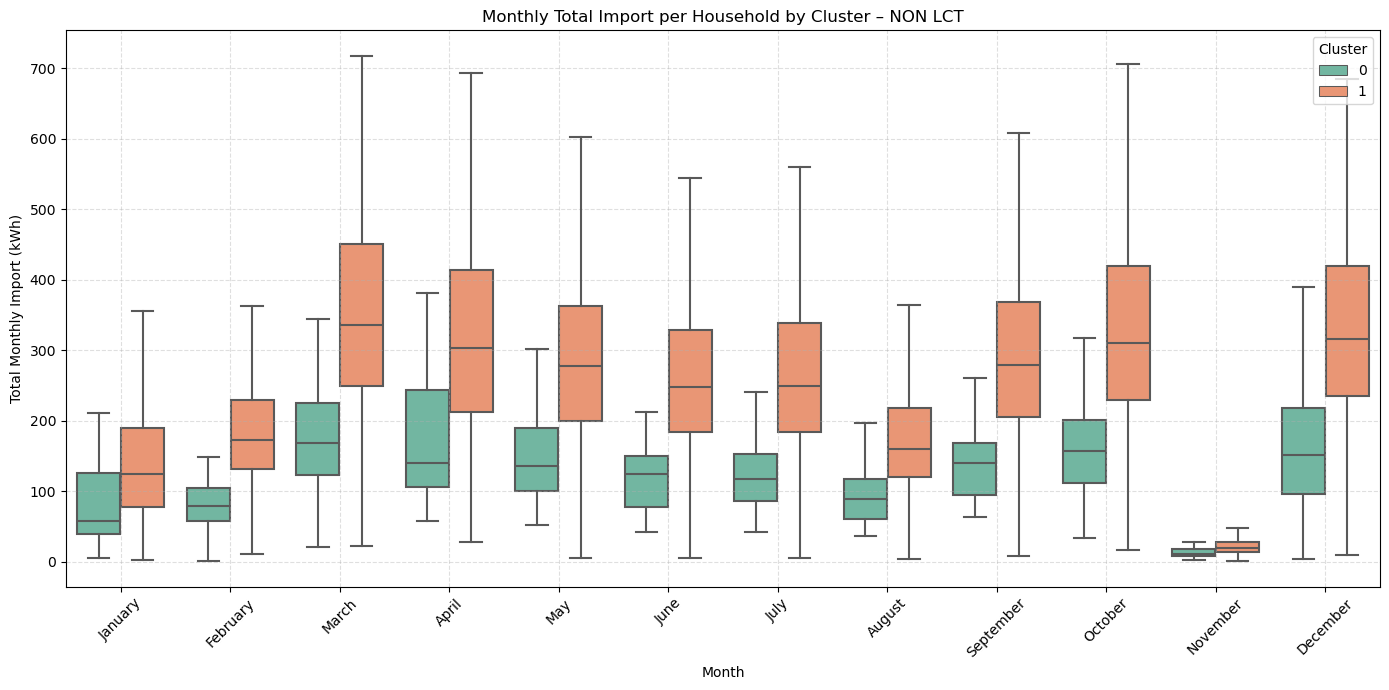

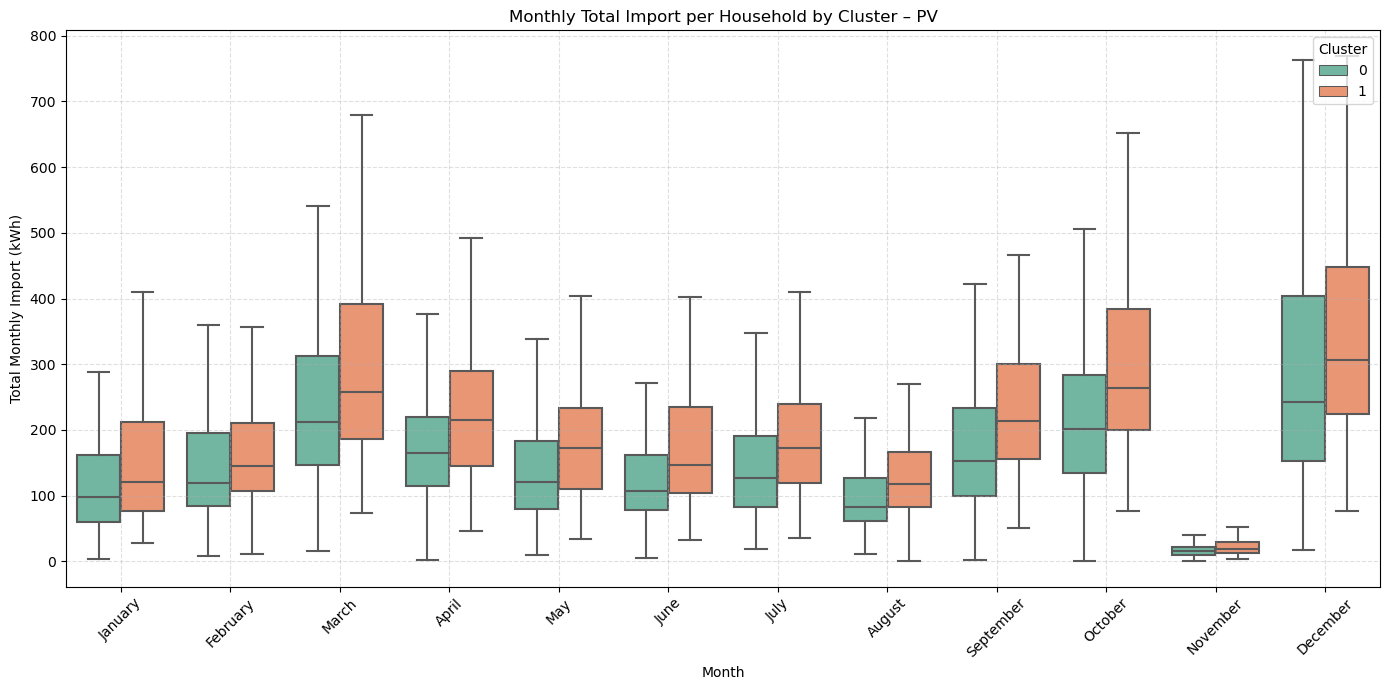

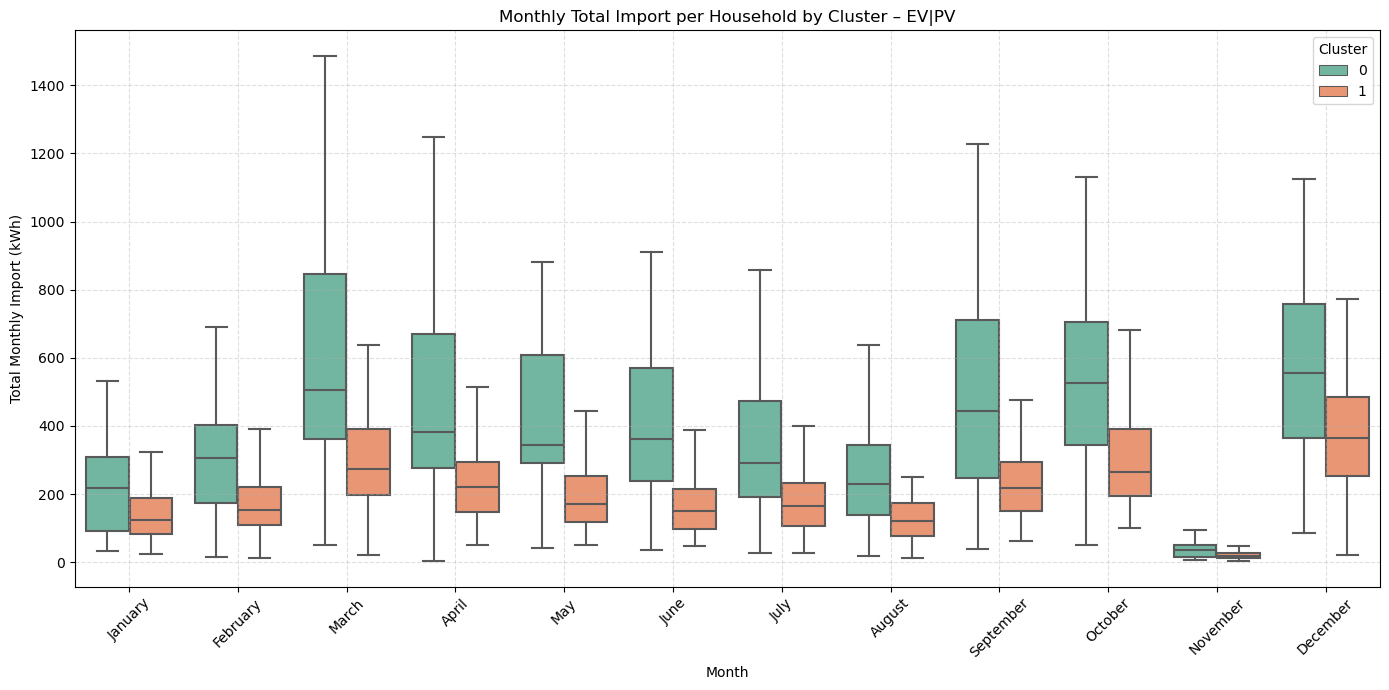

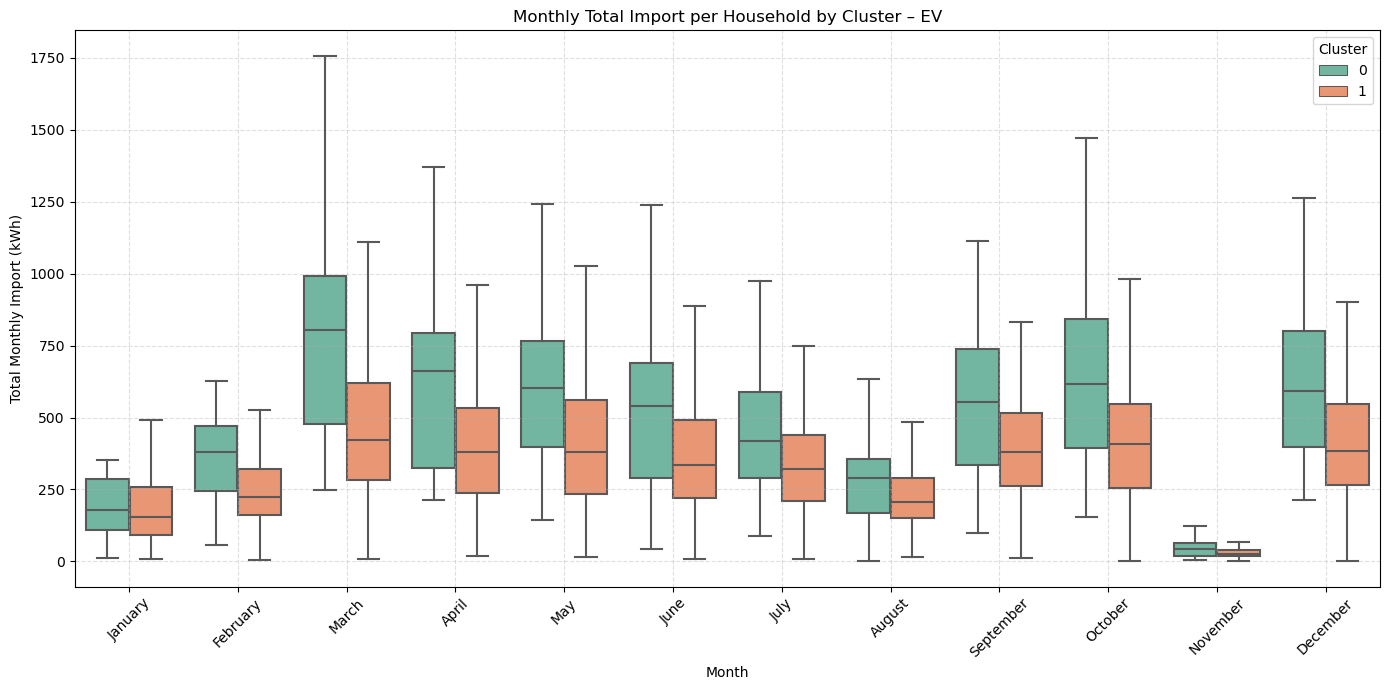

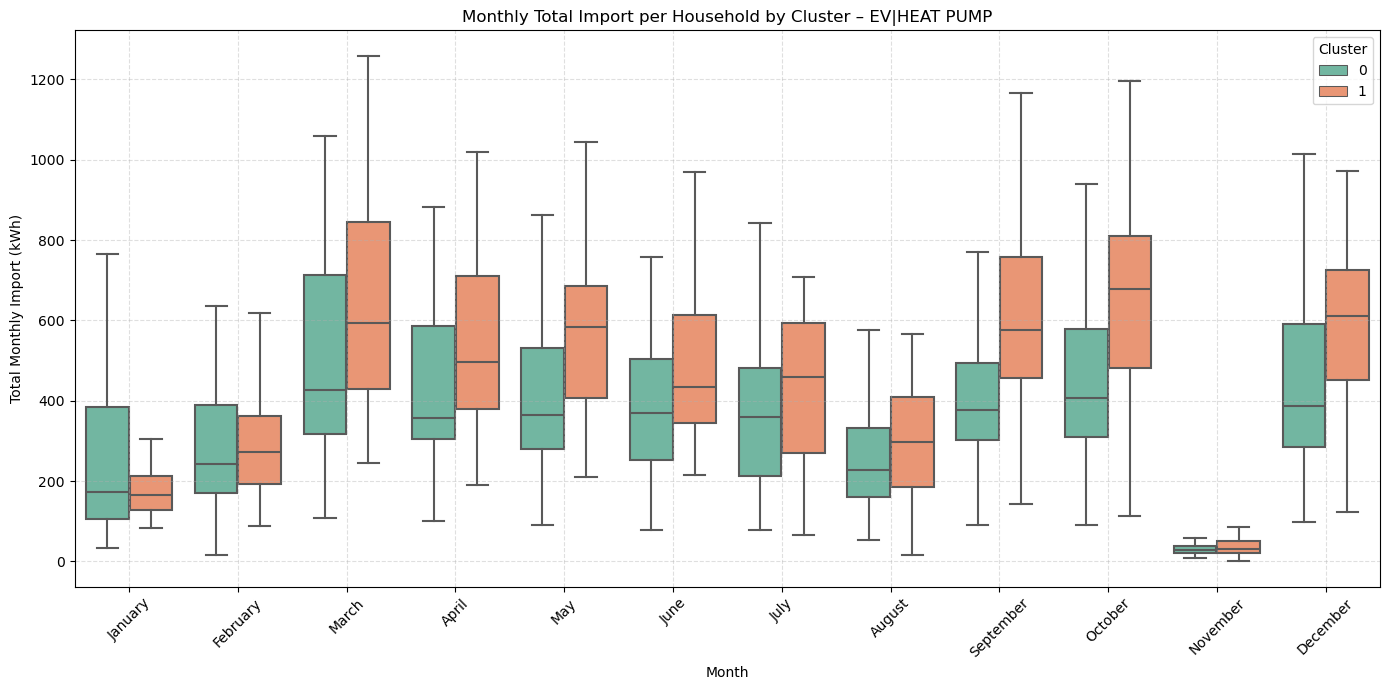

In [ ]:
for lct in monthly_totals['LCT Type'].dropna().unique():
    lct_df = monthly_totals[monthly_totals['LCT Type'] == lct]
    
    plt.figure(figsize=(14, 7))
    ax = sns.boxplot(
        data=lct_df,
        x='Month_Name',
        y='Active import (kW)',
        hue='Cluster',
        palette='Set2',
        showfliers=False
    )
    
    plt.title(f"Monthly Total Import per Household by Cluster – {lct}")
    plt.xlabel("Month")
    plt.ylabel("Total Monthly Import (kWh)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(title='Cluster', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
nov = monthly_totals[monthly_totals['Month_Name']=='November']

In [ ]:
nov

Profile      Month  Active import (kW)  Cluster      LCT Type  \
10196  Profile_916 2023-11-30              31.963        1       NON LCT   
2014   Profile_249 2023-11-30              14.962        1       NON LCT   
5564   Profile_539 2023-11-30              13.504        0            PV   
1392     Profile_2 2023-11-30              19.679        0       NON LCT   
1452   Profile_203 2023-11-30              34.138        1            PV   
...            ...        ...                 ...      ...           ...   
2296   Profile_273 2023-11-30              25.528        1            PV   
9190   Profile_832 2023-11-30               6.891        0            PV   
9670   Profile_871 2023-11-30               7.482        0       NON LCT   
3787   Profile_393 2023-11-30              17.832        1         EV|PV   
9298   Profile_842 2023-11-30              24.482        0  EV|HEAT PUMP   

      Month_Name  Month_Num  
10196   November         11  
2014    November         11  
5564    November         11  
1392    November         11  
1452    November         11  
...          ...        ...  
2296    November         11  
9190    November         11  
9670    November         11  
3787    November         11  
9298    November         11  

[911 rows x 7 columns]

for prof in combined_df_con['Profile'].unique():
    for month in range()
    cc=combined_df_con[combined_df_con['Month']==10]
    cc1 = cc[cc['Profile']==prof]
    print(cc1['Active import (kW)'].sum())

In [ ]:
df['Datetime'].min()

'2023-01-01 00:00:00'

In [ ]:
monthly_avg = monthly_totals.groupby(['LCT Type', 'Month_Name', 'Month_Num', 'Cluster'])[
    'Active import (kW)'
].mean().reset_index()

In [ ]:
monthly_avg.sort_values('Month_Num', inplace=True)

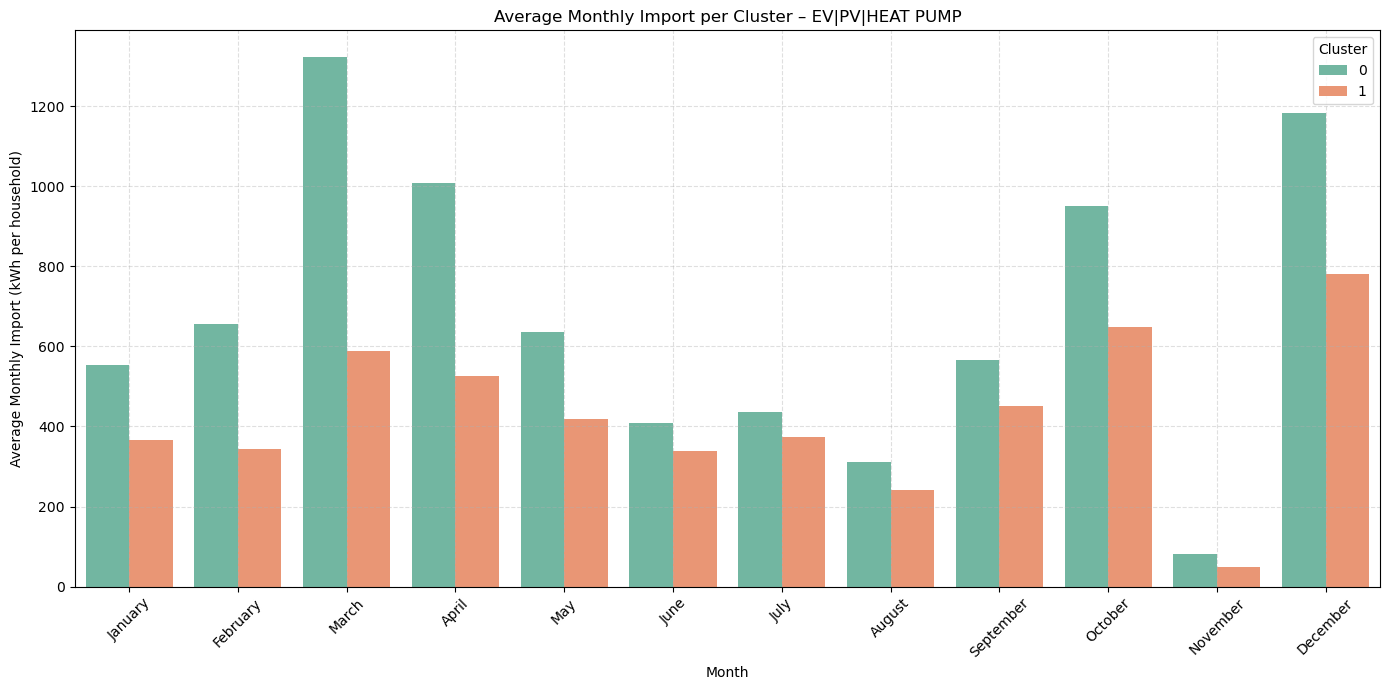

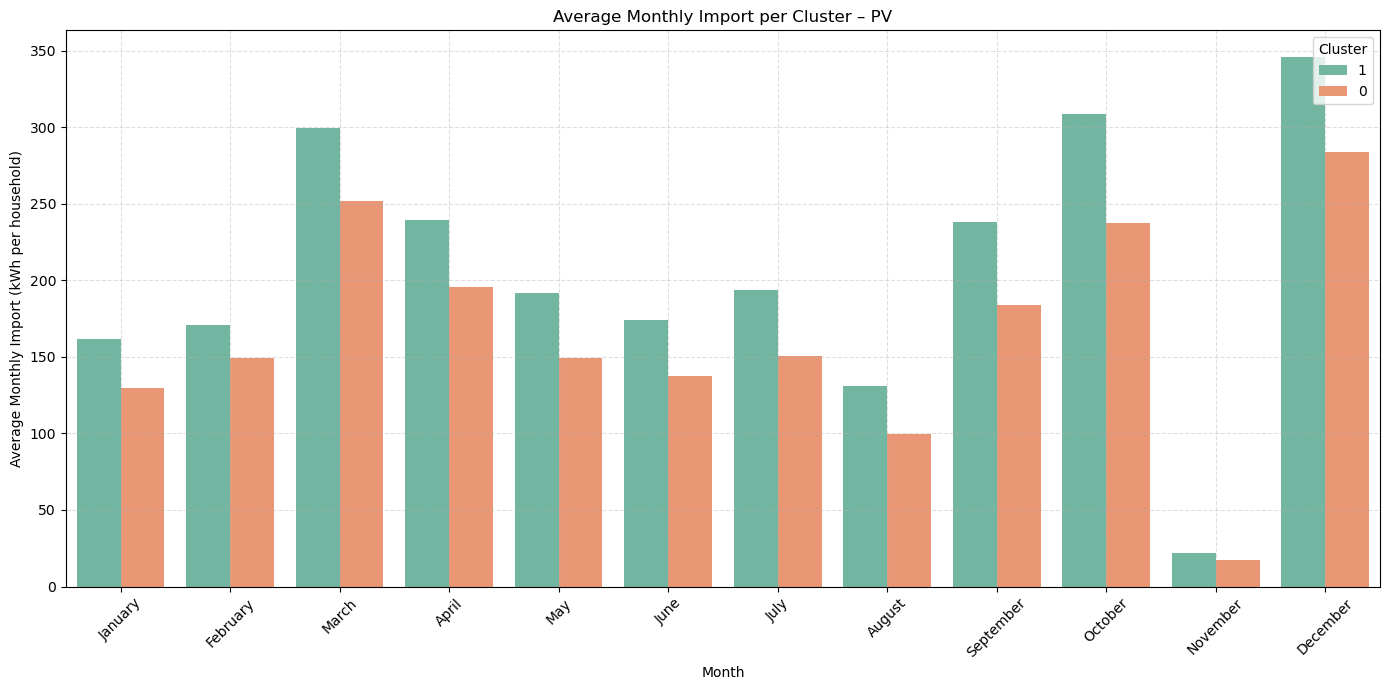

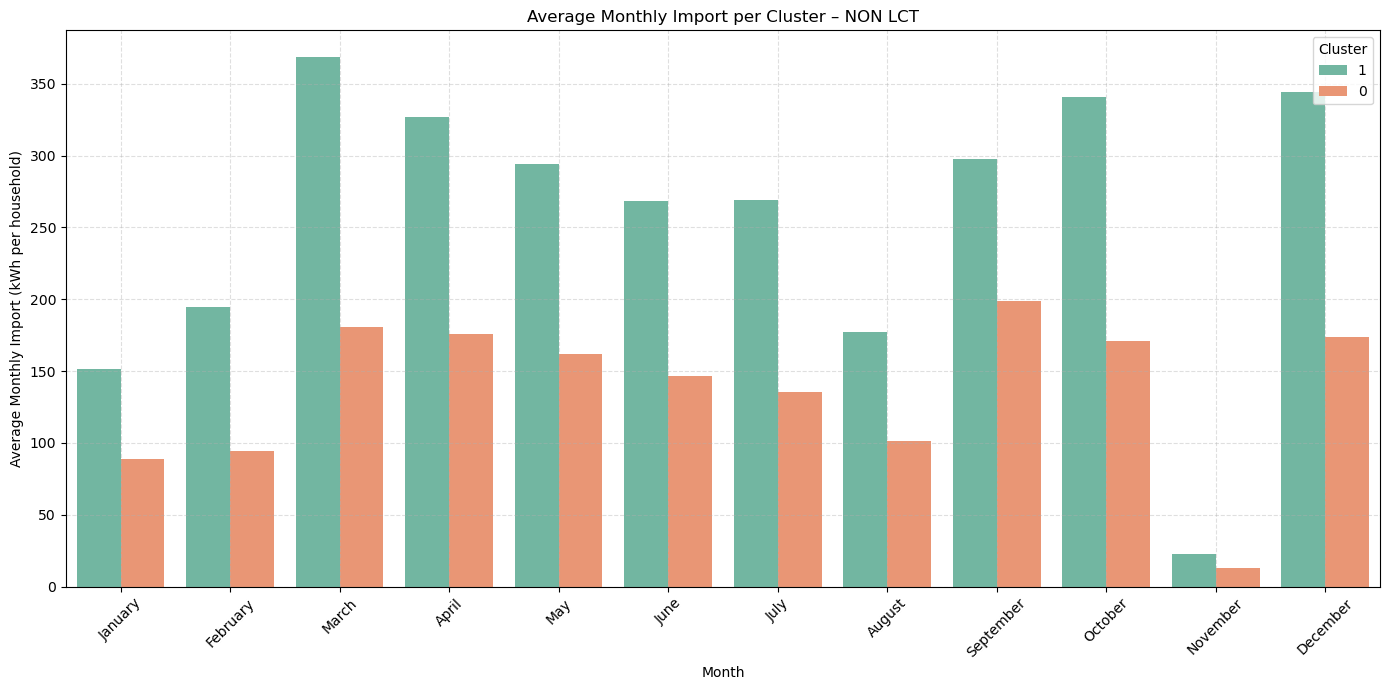

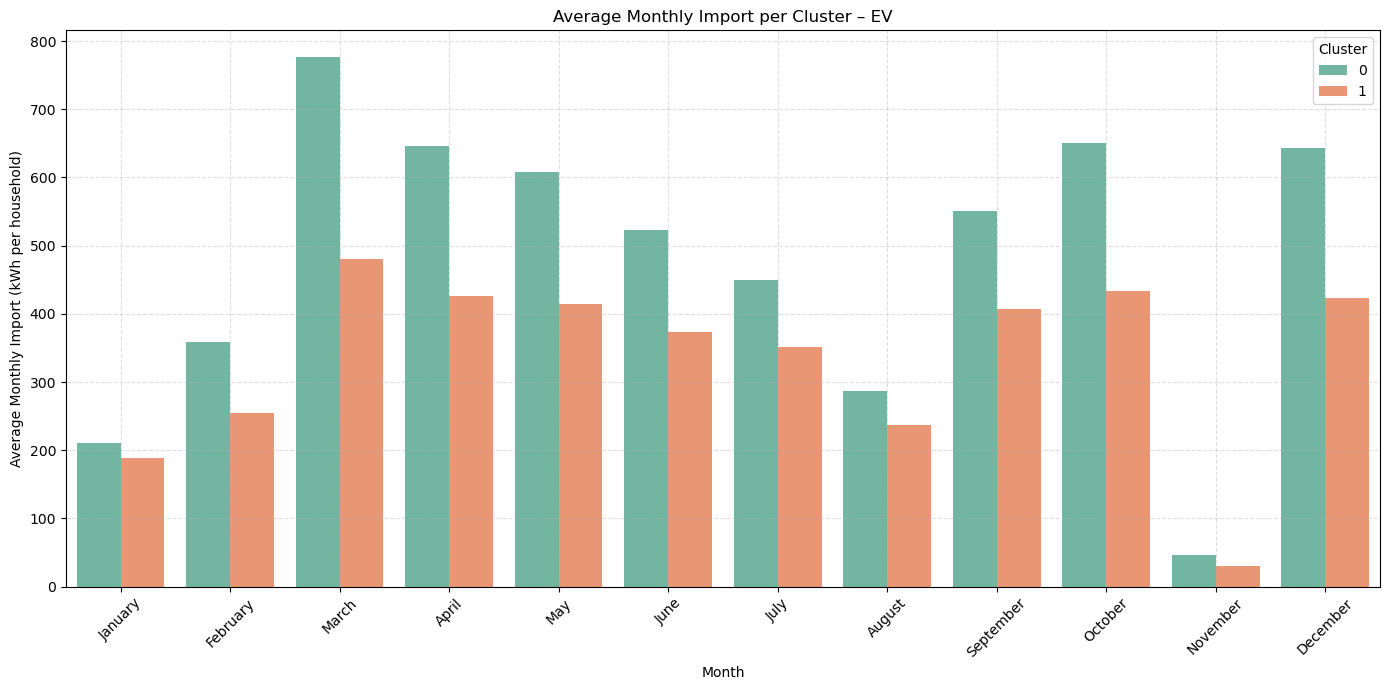

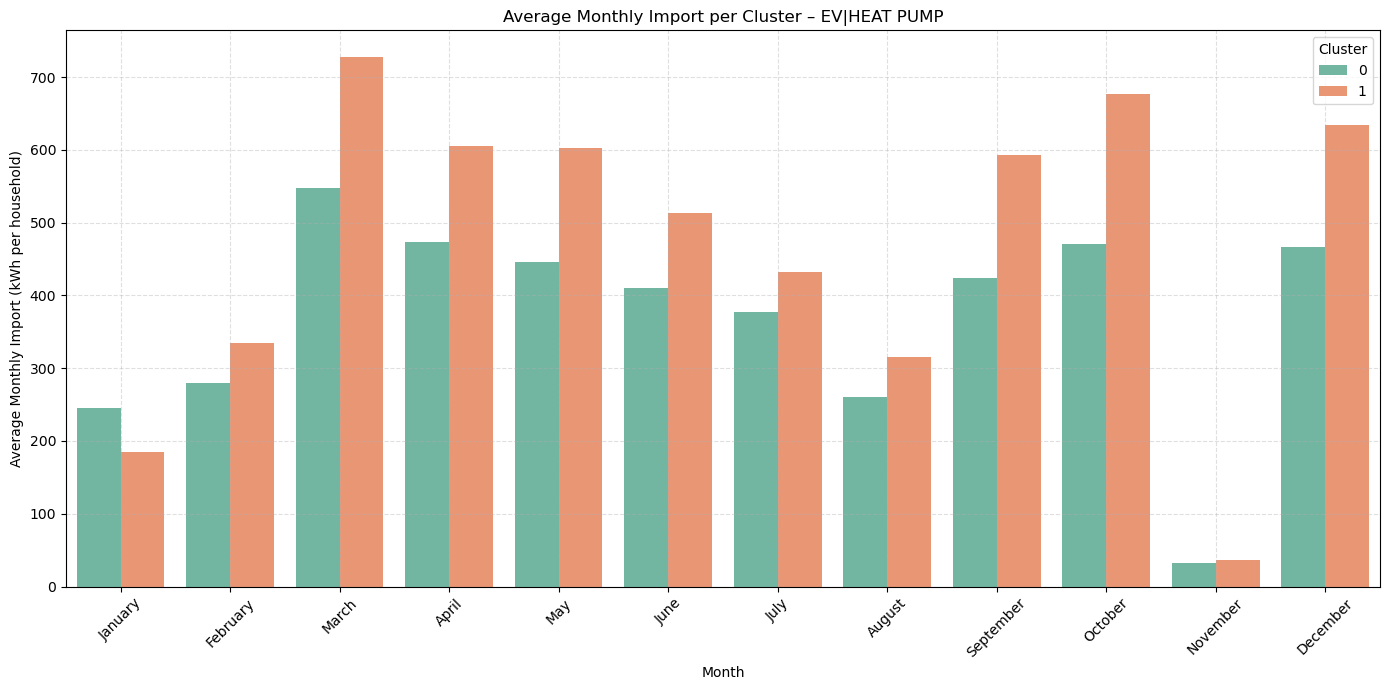

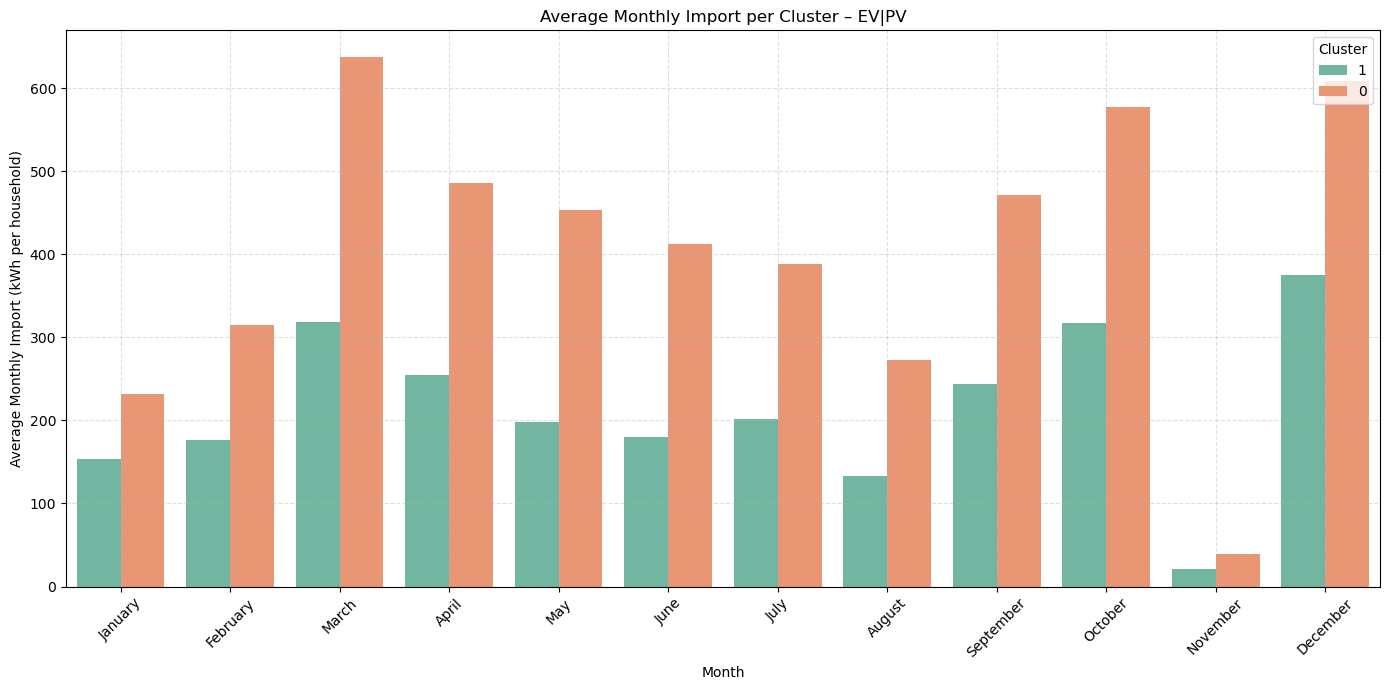

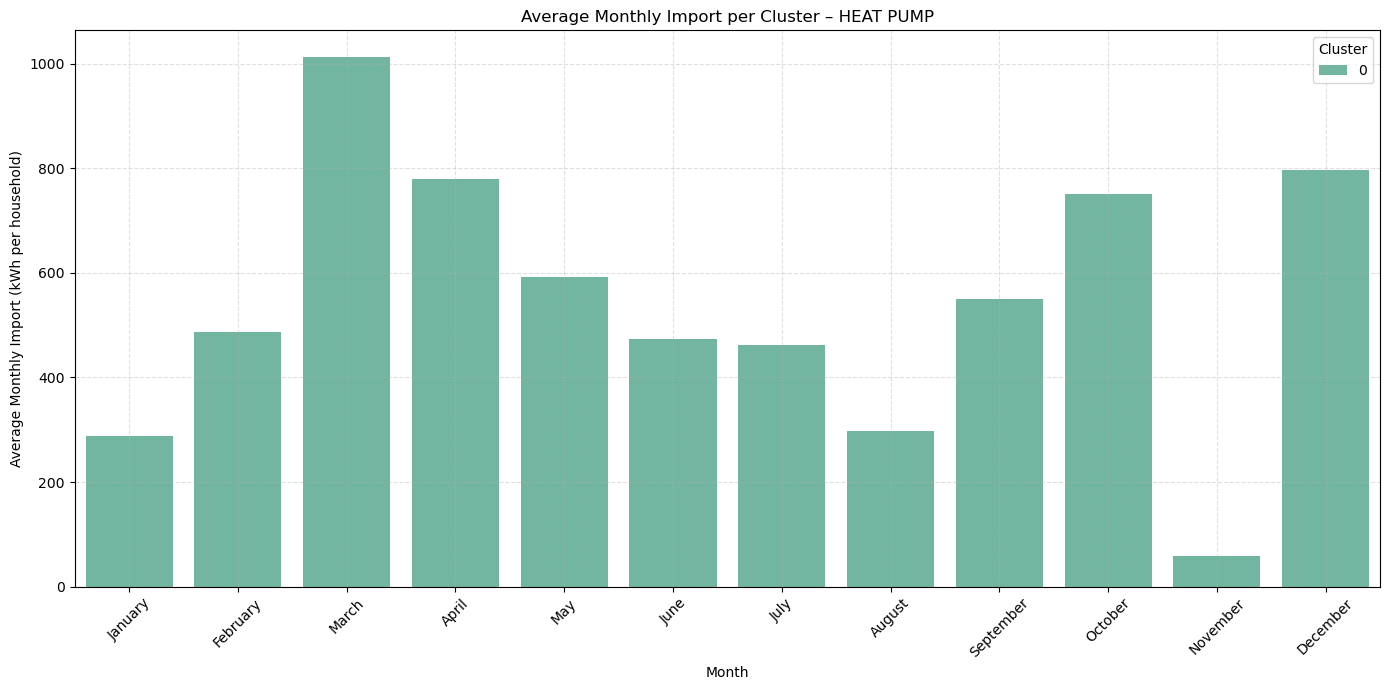

In [ ]:
monthly_avg['Cluster'] = monthly_avg['Cluster'].astype(str)

for lct in monthly_avg['LCT Type'].dropna().unique():
    lct_df = monthly_avg[monthly_avg['LCT Type'] == lct]
    
    plt.figure(figsize=(14, 7))
    sns.barplot(
        data=lct_df,
        x='Month_Name',
        y='Active import (kW)',
        hue='Cluster',
        palette='Set2'
    )
    
    plt.title(f"Average Monthly Import per Cluster – {lct}")
    plt.xlabel("Month")
    plt.ylabel("Average Monthly Import (kWh per household)")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(title='Cluster', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
if 'Profile' not in combined_clusters.columns:
    combined_clusters = combined_clusters.reset_index()


In [ ]:
hourly_data = combined_df_con.merge(
    combined_clusters[['Profile', 'Cluster']], on='Profile', how='inner'
)

In [ ]:
hourly_data = hourly_data.merge(combined_lct_info, on='Profile', how='left')

In [ ]:
hourly_data

Active export (W)  Active import (W)  Reactive export (Var)  \
0                      0.0              120.0              64.000000   
1                      0.0              100.0              69.333333   
2                      0.0              172.0              34.000000   
3                      0.0              174.0              28.000000   
4                      0.0              176.0              26.000000   
...                    ...                ...                    ...   
5535230                0.0             6935.0               0.000000   
5535231                0.0             5230.0              52.000000   
5535232                0.0             2917.0             178.000000   
5535233                0.0             2140.0             395.000000   
5535234                0.0             3194.0             117.000000   

         Reactive import (Var)  Active import (kW)  Active export (kW)  \
0                          0.0               0.120                 0.0   
1                          0.0               0.100                 0.0   
2                          8.0               0.172                 0.0   
3                          4.0               0.174                 0.0   
4                          8.0               0.176                 0.0   
...                        ...                 ...                 ...   
5535230                 1076.0               6.935                 0.0   
5535231                  658.0               5.230                 0.0   
5535232                  407.0               2.917                 0.0   
5535233                  195.0               2.140                 0.0   
5535234                  482.0               3.194                 0.0   

              LCT Type_x Tariff      Profile  Month  Hour YearMonth  \
0                NON LCT   T011    Profile_1    1.0   0.0   2023-01   
1                NON LCT   T011    Profile_1    1.0   1.0   2023-01   
2                NON LCT   T011    Profile_1    1.0   3.0   2023-01   
3                NON LCT   T011    Profile_1    1.0   4.0   2023-01   
4                NON LCT   T011    Profile_1    1.0   5.0   2023-01   
...                  ...    ...          ...    ...   ...       ...   
5535230  EV|PV|HEAT PUMP   T012  Profile_995   12.0  19.0   2023-12   
5535231  EV|PV|HEAT PUMP   T012  Profile_995   12.0  20.0   2023-12   
5535232  EV|PV|HEAT PUMP   T012  Profile_995   12.0  21.0   2023-12   
5535233  EV|PV|HEAT PUMP   T012  Profile_995   12.0  22.0   2023-12   
5535234  EV|PV|HEAT PUMP   T012  Profile_995   12.0  23.0   2023-12   

         Normalized import (kW)  Normalized export (kW)  Season  DayType  \
0                      0.039938                     0.0  Winter  Weekend   
1                      0.033282                     0.0  Winter  Weekend   
2                      0.057244                     0.0  Winter  Weekend   
3                      0.057910                     0.0  Winter  Weekend   
4                      0.058576                     0.0  Winter  Weekend   
...                         ...                     ...     ...      ...   
5535230                0.058826                     0.0  Winter  Weekend   
5535231                0.044363                     0.0  Winter  Weekend   
5535232                0.024743                     0.0  Winter  Weekend   
5535233                0.018152                     0.0  Winter  Weekend   
5535234                0.027093                     0.0  Winter  Weekend   

               Tech_Type  Cluster       LCT Type_y  
0                NON LCT        0          NON LCT  
1                NON LCT        0          NON LCT  
2                NON LCT        0          NON LCT  
3                NON LCT        0          NON LCT  
4                NON LCT        0          NON LCT  
...                  ...      ...              ...  
5535230  EV|PV|HEAT PUMP        0  EV|PV|HEAT PUMP  
5535231  EV|PV|HEAT PUMP        0  EV|PV|HEAT PUMP  
5535232  EV|

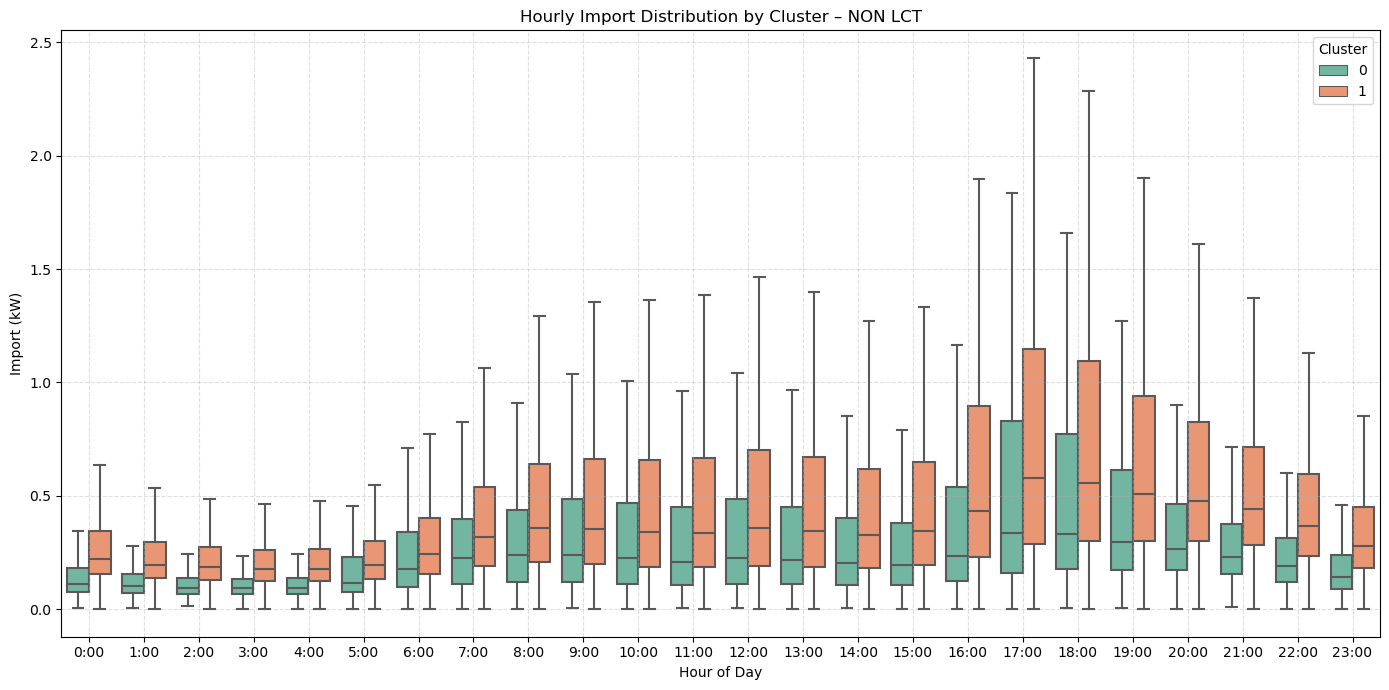

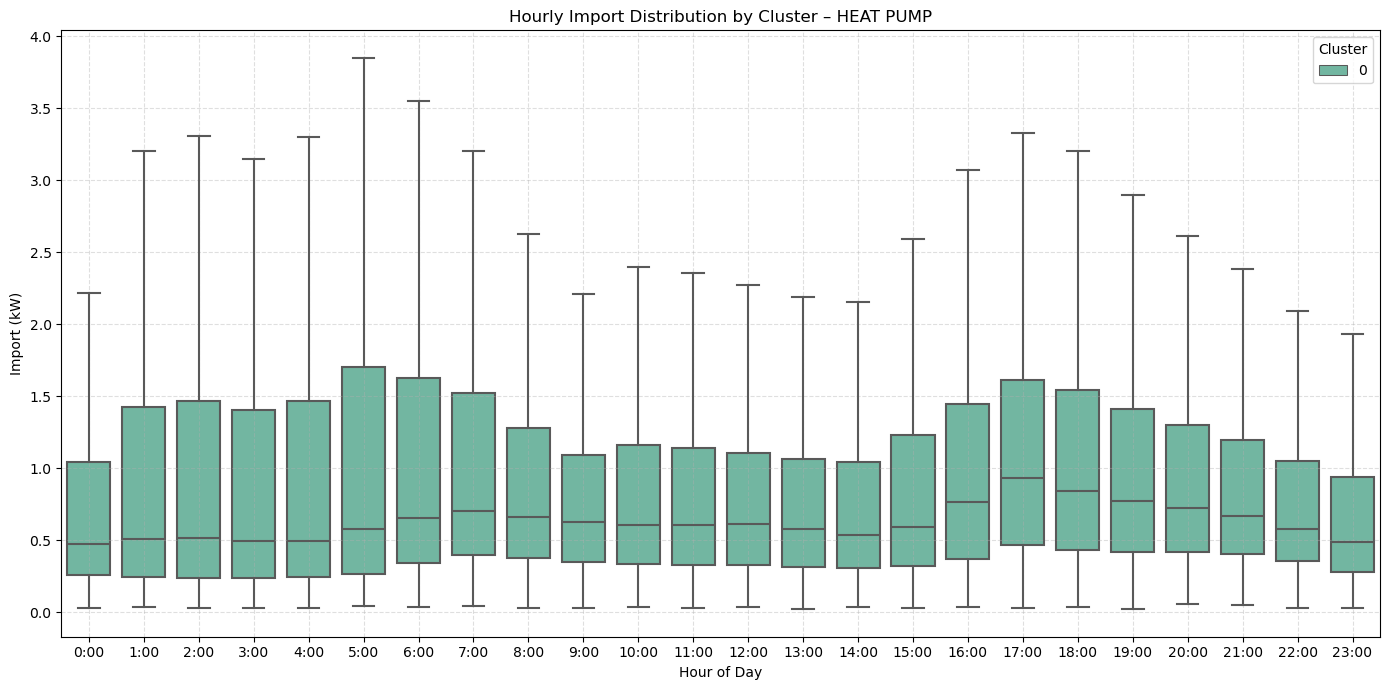

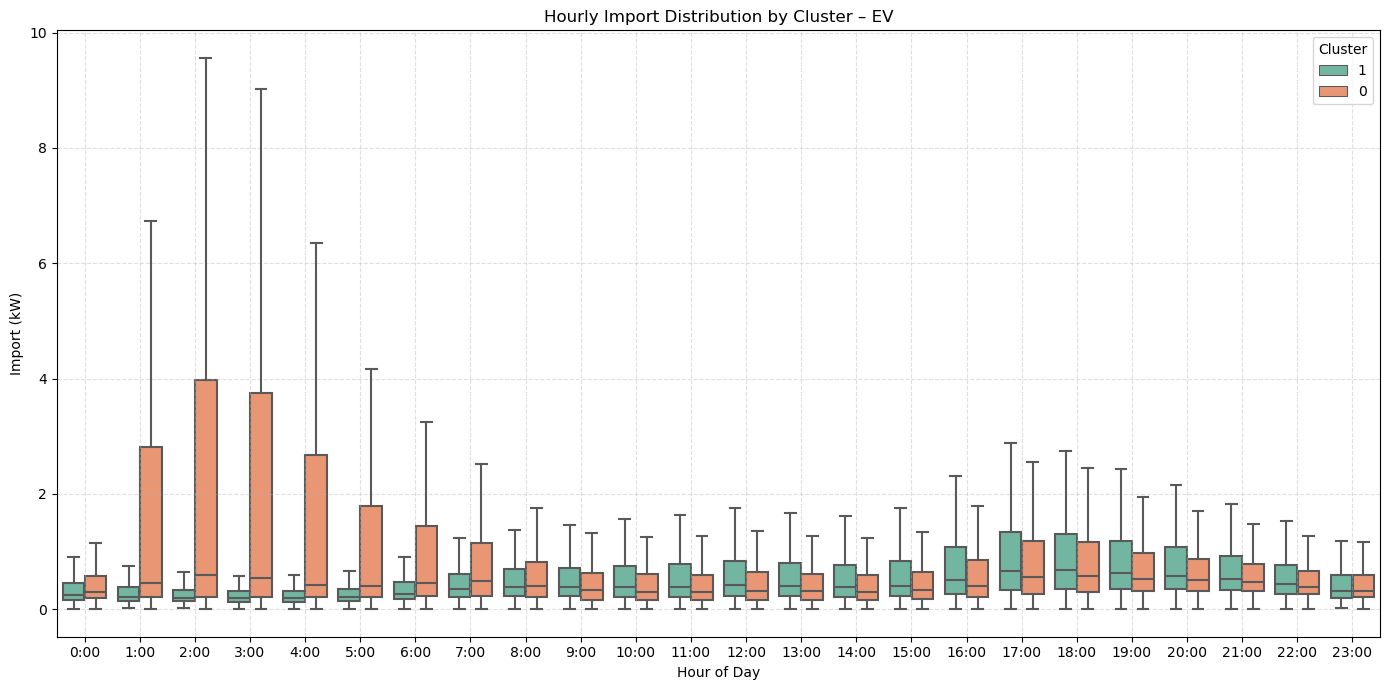

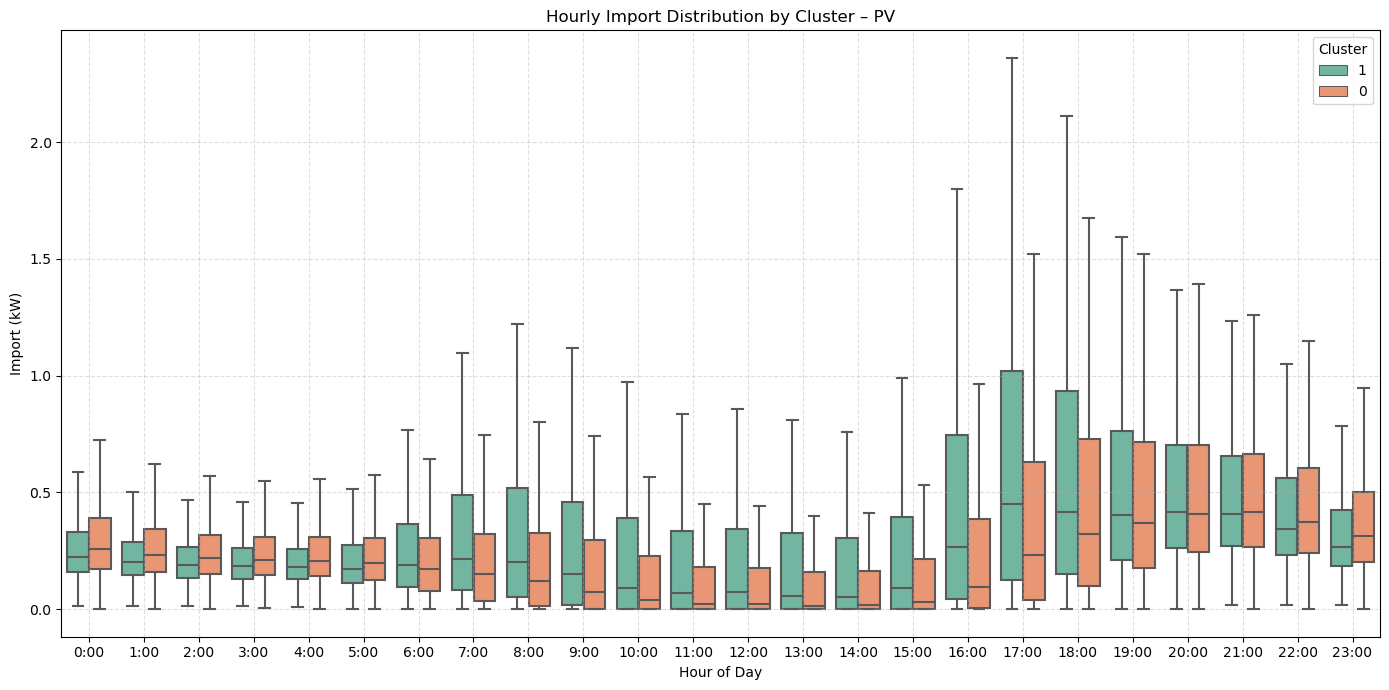

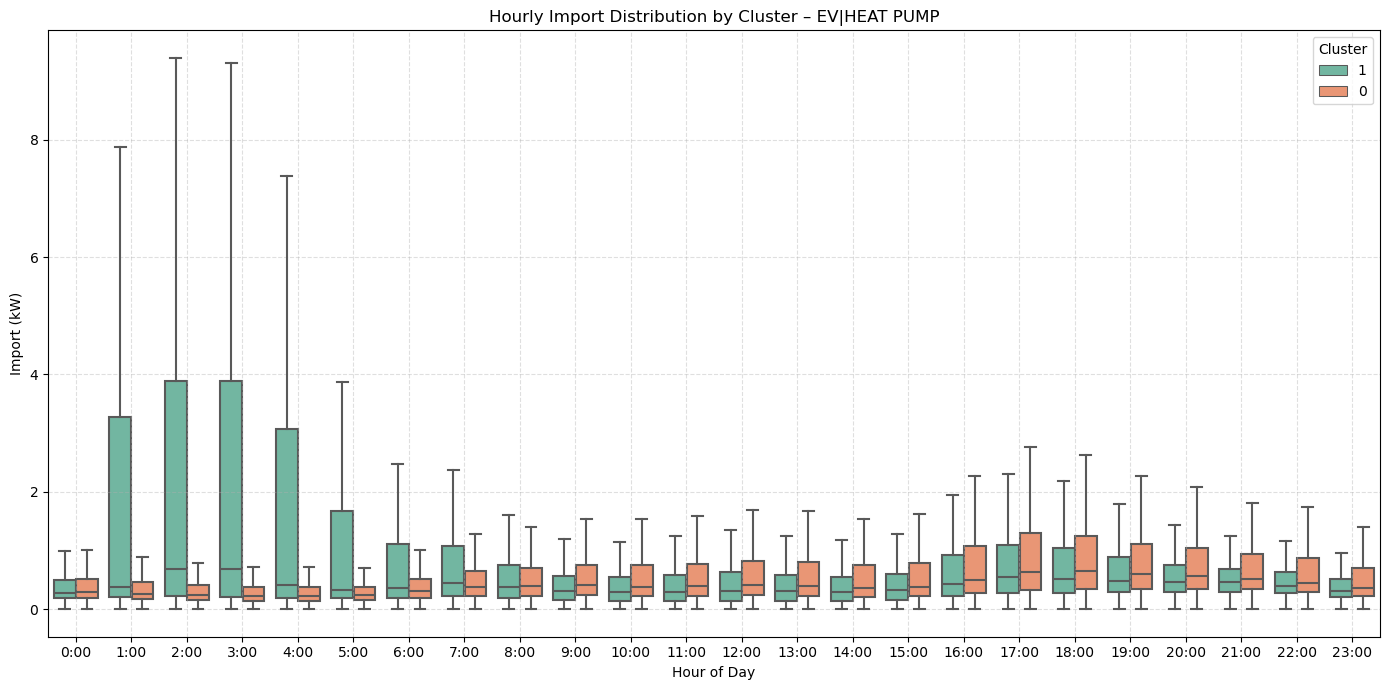

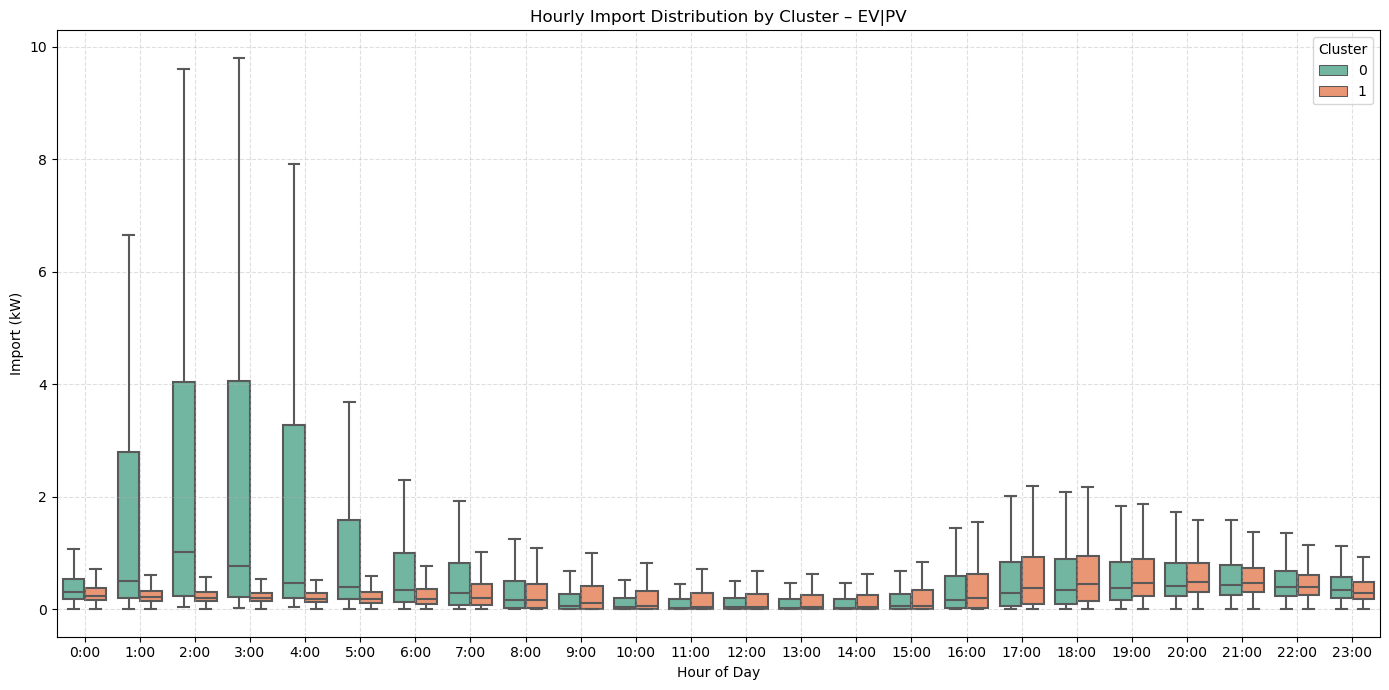

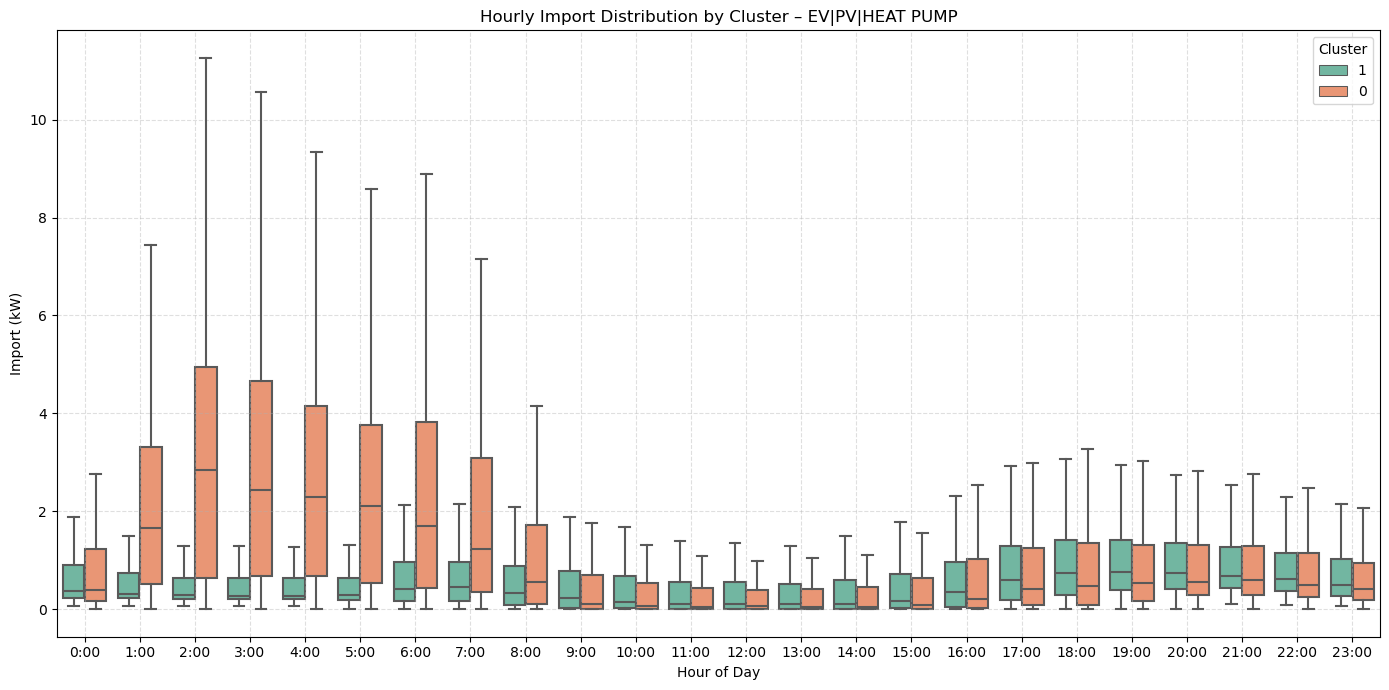

In [ ]:
hourly_data['Cluster'] = hourly_data['Cluster'].astype(str)
for lct in hourly_data['Tech_Type'].dropna().unique():
    lct_df = hourly_data[hourly_data['Tech_Type'] == lct]

    plt.figure(figsize=(14, 7))
    ax = sns.boxplot(
        data=lct_df,
        x='Hour',
        y='Active import (kW)',
        hue='Cluster',
        palette='Set2',
        showfliers=False
    )

    plt.title(f"Hourly Import Distribution by Cluster – {lct}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Import (kW)")
    plt.xticks(ticks=range(24), labels=[f"{h}:00" for h in range(24)])
    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(title='Cluster', loc='upper right')
    plt.tight_layout()
    plt.show()

In [ ]:
hp_profile = hourly_data[
    (hourly_data['Tech_Type'] == 'HEAT PUMP') & (hourly_data['Cluster'] == '0')
].groupby('Hour')['Active import (kW)'].mean().reset_index(name='HP_Cluster0')


non_lct_profile = hourly_data[
    (hourly_data['Tech_Type'] == 'NON LCT') & (hourly_data['Cluster'] == '1')
].groupby('Hour')['Active import (kW)'].mean().reset_index(name='NONLCT_Cluster1')

In [ ]:
comparison = hp_profile.merge(non_lct_profile, on='Hour')

In [ ]:
comparison['Estimated_HP_only'] = comparison['HP_Cluster0'] - comparison['NONLCT_Cluster1']

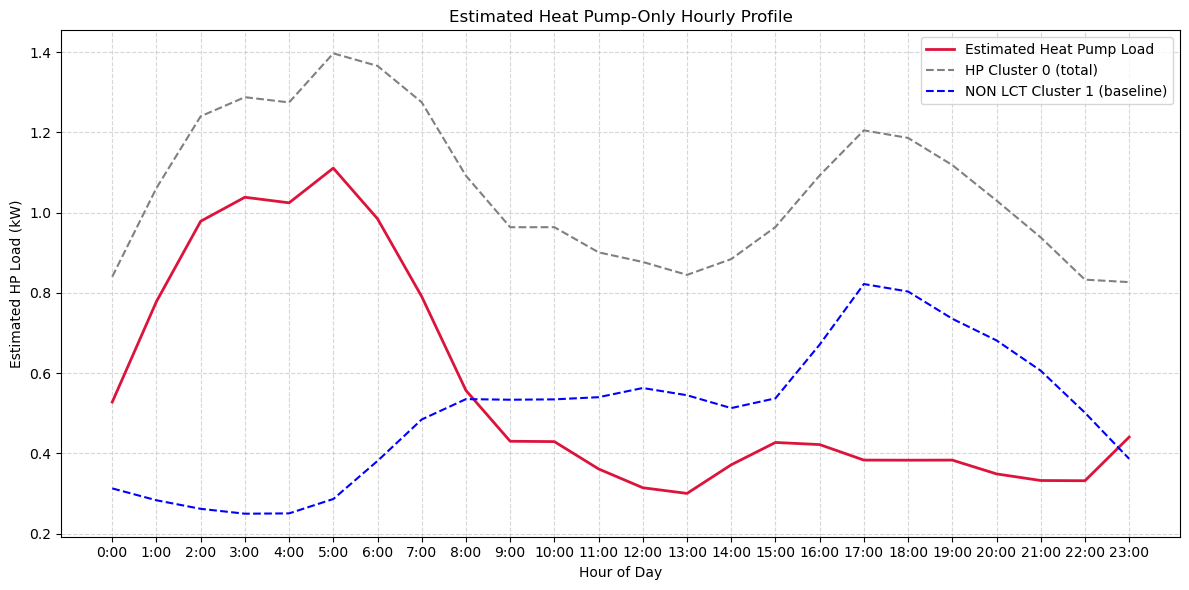

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(comparison['Hour'], comparison['Estimated_HP_only'], color='crimson', linewidth=2, label='Estimated Heat Pump Load')
plt.plot(comparison['Hour'], comparison['HP_Cluster0'], '--', color='gray', label='HP Cluster 0 (total)')
plt.plot(comparison['Hour'], comparison['NONLCT_Cluster1'], '--', color='blue', label='NON LCT Cluster 1 (baseline)')

plt.title("Estimated Heat Pump-Only Hourly Profile")
plt.xlabel("Hour of Day")
plt.ylabel("Estimated HP Load (kW)")
plt.xticks(range(24), [f"{h}:00" for h in range(24)])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
hp_profile = hourly_data[
    (hourly_data['Tech_Type'] == 'HEAT PUMP') & (hourly_data['Cluster'] == '0')
].groupby('Hour')['Active import (kW)'].mean().reset_index(name='HP_Cluster0')


non_lct_profile = hourly_data[
    (hourly_data['Tech_Type'] == 'NON LCT') & (hourly_data['Cluster'] == '0')
].groupby('Hour')['Active import (kW)'].mean().reset_index(name='NONLCT_Cluster0')

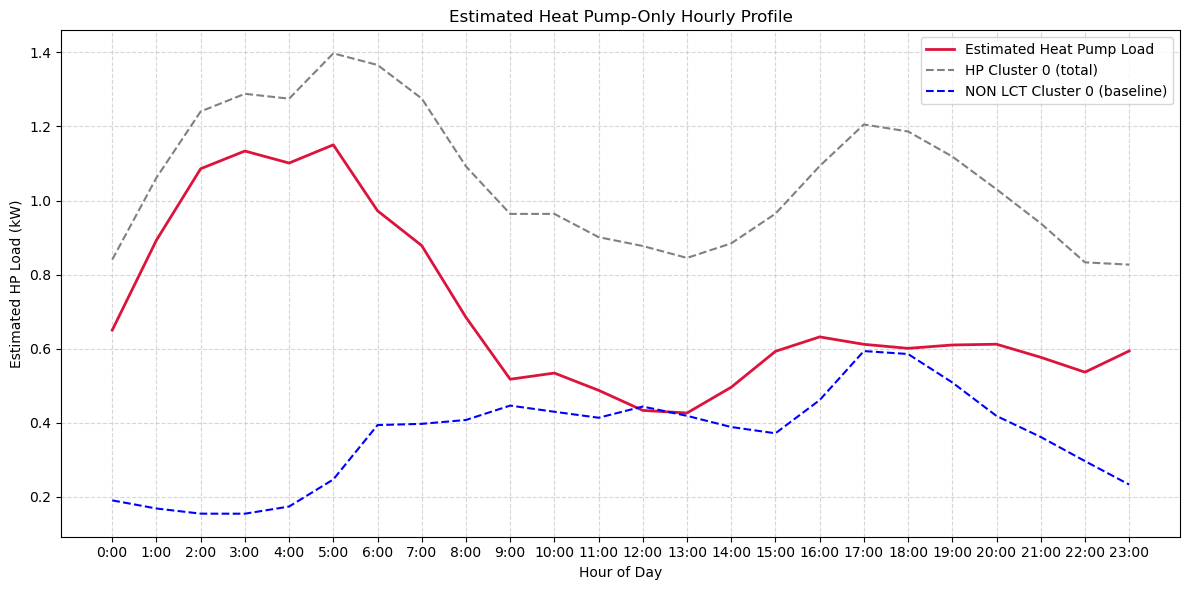

In [ ]:
comparison = hp_profile.merge(non_lct_profile, on='Hour')
comparison['Estimated_HP_only'] = comparison['HP_Cluster0'] - comparison['NONLCT_Cluster0']
plt.figure(figsize=(12, 6))
plt.plot(comparison['Hour'], comparison['Estimated_HP_only'], color='crimson', linewidth=2, label='Estimated Heat Pump Load')
plt.plot(comparison['Hour'], comparison['HP_Cluster0'], '--', color='gray', label='HP Cluster 0 (total)')
plt.plot(comparison['Hour'], comparison['NONLCT_Cluster0'], '--', color='blue', label='NON LCT Cluster 0 (baseline)')

plt.title("Estimated Heat Pump-Only Hourly Profile")
plt.xlabel("Hour of Day")
plt.ylabel("Estimated HP Load (kW)")
plt.xticks(range(24), [f"{h}:00" for h in range(24)])
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()